## <B> Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_validate, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

import xgboost as xgb
from xgboost import plot_importance
import lightgbm as lgb
from catboost import Pool, CatBoostRegressor

from scipy.stats import uniform, randint
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import plot_importance

In [2]:
import warnings
warnings.filterwarnings("ignore")

import optuna
from optuna.samplers import TPESampler

## <B> Read Data

In [3]:
# Final cleansed dataset with 7390 rows
df = pd.read_csv("99.co_rental_listing_220209_final_numeric.csv", encoding='cp1252')
df.head()

,rental_per_month,beds,size_sqft,furnishing,lease,district,age,nearest_mrt,dist_to_mall_km,dist_to_mrt_km,dist_to_cbd_km,nearest_psch_dist,nearest_isch_dist,near_top30_psch_2km,nearest_biz_park_dist,dist_to_airport_km,dist_to_hawk_km,dist_to_park_km
0,800,1,150,Fully Furnished,12m_and_less,D27,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,0,4.94,19.48,0.76,0.57
1,1600,1,250,Partially Furnished,more_than_12m,D27,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,0,4.94,19.48,0.76,0.57
2,800,1,150,Fully Furnished,12m_and_less,D27,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,0,4.94,19.48,0.76,0.57
3,1600,1,250,Partially Furnished,more_than_12m,D27,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,0,4.94,19.48,0.76,0.57
4,800,1,150,Fully Furnished,12m_and_less,D27,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,0,4.94,19.48,0.76,0.57


In [4]:
df['rental_per_month_log'] = np.log(df['rental_per_month'])

In [5]:
df.shape

(7390, 19)

In [6]:
df.head()

,rental_per_month,beds,size_sqft,furnishing,lease,district,age,nearest_mrt,dist_to_mall_km,dist_to_mrt_km,dist_to_cbd_km,nearest_psch_dist,nearest_isch_dist,near_top30_psch_2km,nearest_biz_park_dist,dist_to_airport_km,dist_to_hawk_km,dist_to_park_km,rental_per_month_log
0,800,1,150,Fully Furnished,12m_and_less,D27,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,0,4.94,19.48,0.76,0.57,6.684612
1,1600,1,250,Partially Furnished,more_than_12m,D27,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,0,4.94,19.48,0.76,0.57,7.377759
2,800,1,150,Fully Furnished,12m_and_less,D27,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,0,4.94,19.48,0.76,0.57,6.684612
3,1600,1,250,Partially Furnished,more_than_12m,D27,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,0,4.94,19.48,0.76,0.57,7.377759
4,800,1,150,Fully Furnished,12m_and_less,D27,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,0,4.94,19.48,0.76,0.57,6.684612


In [7]:
df.columns

Index(['rental_per_month', 'beds', 'size_sqft', 'furnishing', 'lease',
       'district', 'age', 'nearest_mrt', 'dist_to_mall_km', 'dist_to_mrt_km',
       'dist_to_cbd_km', 'nearest_psch_dist', 'nearest_isch_dist',
       'near_top30_psch_2km', 'nearest_biz_park_dist', 'dist_to_airport_km',
       'dist_to_hawk_km', 'dist_to_park_km', 'rental_per_month_log'],
      dtype='object')

In [8]:
df.columns

Index(['rental_per_month', 'beds', 'size_sqft', 'furnishing', 'lease',
       'district', 'age', 'nearest_mrt', 'dist_to_mall_km', 'dist_to_mrt_km',
       'dist_to_cbd_km', 'nearest_psch_dist', 'nearest_isch_dist',
       'near_top30_psch_2km', 'nearest_biz_park_dist', 'dist_to_airport_km',
       'dist_to_hawk_km', 'dist_to_park_km', 'rental_per_month_log'],
      dtype='object')

In [9]:
df['rental_per_month_log'].mean()

8.344071005784647

## <B> Whether having an MRT station is significant

In [10]:
df['mrt_availability'] = np.where(df['dist_to_mrt_km'] <= 0.5, 1 , 0)

In [11]:
df.head()

,rental_per_month,beds,size_sqft,furnishing,lease,district,age,nearest_mrt,dist_to_mall_km,dist_to_mrt_km,dist_to_cbd_km,nearest_psch_dist,nearest_isch_dist,near_top30_psch_2km,nearest_biz_park_dist,dist_to_airport_km,dist_to_hawk_km,dist_to_park_km,rental_per_month_log,mrt_availability
0,800,1,150,Fully Furnished,12m_and_less,D27,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,0,4.94,19.48,0.76,0.57,6.684612,0
1,1600,1,250,Partially Furnished,more_than_12m,D27,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,0,4.94,19.48,0.76,0.57,7.377759,0
2,800,1,150,Fully Furnished,12m_and_less,D27,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,0,4.94,19.48,0.76,0.57,6.684612,0
3,1600,1,250,Partially Furnished,more_than_12m,D27,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,0,4.94,19.48,0.76,0.57,7.377759,0
4,800,1,150,Fully Furnished,12m_and_less,D27,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,0,4.94,19.48,0.76,0.57,6.684612,0


In [12]:
df.groupby('mrt_availability')['rental_per_month'].mean() 

mrt_availability
0    5254.227649
1    4834.943972
Name: rental_per_month, dtype: float64

In [14]:
from scipy import stats
def mean_ttest(feature, a, b, significant_level = 0.05):
    z, p = stats.ttest_ind(a, b)
    if p < significant_level:
        state = 'Null Hypothesis Rejected'
    else:
        state = 'Fail to reject Null Hypothesis'
        
    print('******************************')
    print(feature)
    print(state)
    print('p-value', p)
    return state

In [15]:
no = df.loc[df['mrt_availability'] == 0, 'rental_per_month']
yes = df.loc[df['mrt_availability'] == 1, 'rental_per_month']
mean_ttest('mrt_availability', no, yes, significant_level = 0.05)

******************************
mrt_availability
Null Hypothesis Rejected
p-value 1.0205391393905071e-07


'Null Hypothesis Rejected'

From the hypothesis testing, we observe that having an MRT station within 500 m is significant to the monthly rental.

### <B> Create rental_per_month_log and Drop rental_per_month

In [16]:
df = df[['rental_per_month_log', 'beds', 'size_sqft', 
         'furnishing', 'lease', 'district', 'age', 
         'nearest_mrt', 'dist_to_mall_km', 'dist_to_mrt_km', 
         'dist_to_cbd_km', 'nearest_psch_dist', 
         'nearest_isch_dist', 'near_top30_psch_2km',
         'nearest_biz_park_dist', 'dist_to_airport_km',
         'dist_to_hawk_km', 'dist_to_park_km', 'mrt_availability']]

<!-- ## <B> RARE LABEL ENCODE MRT STATIONS -->

## <B> Dummy Code Furnishing, Lease and District 

In [23]:
condo_df_lr = df.copy()

# Generate dummy columns (while dropping first dummy col (drop_first = True) to prevent collinearity in MLR)
condo_df_lr = pd.get_dummies(condo_df_lr, columns = ['district'], drop_first = True)
condo_df_lr = pd.get_dummies(condo_df_lr, columns = ['lease'], drop_first = True)
# condo_df_lr = pd.get_dummies(condo_df_lr, columns = ['nearest_mrt'], drop_first = True)
condo_df_lr = pd.get_dummies(condo_df_lr, columns = ['furnishing'], drop_first = True)
condo_df_lr.head()

,rental_per_month_log,beds,size_sqft,age,nearest_mrt,dist_to_mall_km,dist_to_mrt_km,dist_to_cbd_km,nearest_psch_dist,nearest_isch_dist,...,district_D23,district_D25,district_D26,district_D27,district_D28,lease_Unknown,lease_more_than_12m,furnishing_Partially Furnished,furnishing_Unfurnished,furnishing_Unknown
0,6.684612,1,150,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,...,0,0,0,1,0,0,0,0,0,0
1,7.377759,1,250,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,...,0,0,0,1,0,0,1,1,0,0
2,6.684612,1,150,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,...,0,0,0,1,0,0,0,0,0,0
3,7.377759,1,250,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,...,0,0,0,1,0,0,1,1,0,0
4,6.684612,1,150,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,...,0,0,0,1,0,0,0,0,0,0


In [24]:
condo_df_lr = condo_df_lr.drop(['nearest_mrt'], axis =1)

In [25]:
condo_df_lr.head()

,rental_per_month_log,beds,size_sqft,age,dist_to_mall_km,dist_to_mrt_km,dist_to_cbd_km,nearest_psch_dist,nearest_isch_dist,near_top30_psch_2km,...,district_D23,district_D25,district_D26,district_D27,district_D28,lease_Unknown,lease_more_than_12m,furnishing_Partially Furnished,furnishing_Unfurnished,furnishing_Unknown
0,6.684612,1,150,4,0.71,0.54,17.29,0.59,2.69,0,...,0,0,0,1,0,0,0,0,0,0
1,7.377759,1,250,4,0.71,0.54,17.29,0.59,2.69,0,...,0,0,0,1,0,0,1,1,0,0
2,6.684612,1,150,4,0.71,0.54,17.29,0.59,2.69,0,...,0,0,0,1,0,0,0,0,0,0
3,7.377759,1,250,4,0.71,0.54,17.29,0.59,2.69,0,...,0,0,0,1,0,0,1,1,0,0
4,6.684612,1,150,4,0.71,0.54,17.29,0.59,2.69,0,...,0,0,0,1,0,0,0,0,0,0


## <b> Check Distribution of Continuous Variables

In [26]:
numerical_cols = ['beds', 'size_sqft', 'age', 'dist_to_mall_km', 
                  'dist_to_mrt_km','dist_to_cbd_km', 'nearest_psch_dist', 
                  'nearest_isch_dist', 'nearest_biz_park_dist', 'dist_to_airport_km',
                  'dist_to_hawk_km', 'dist_to_park_km']

In [123]:
def plotdistribution(df, variable, title):
    rows = 4
    cols = 3

    fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize=(16,6))

    index = 0

    for row in range(rows):
        for col in range(cols):
            try:
                sns.histplot(df[variable[index]], ax = ax[row][col], kde=True)
                index += 1
            except:
                continue

    fig.suptitle(title ,fontweight = 'bold')
    plt.tight_layout()

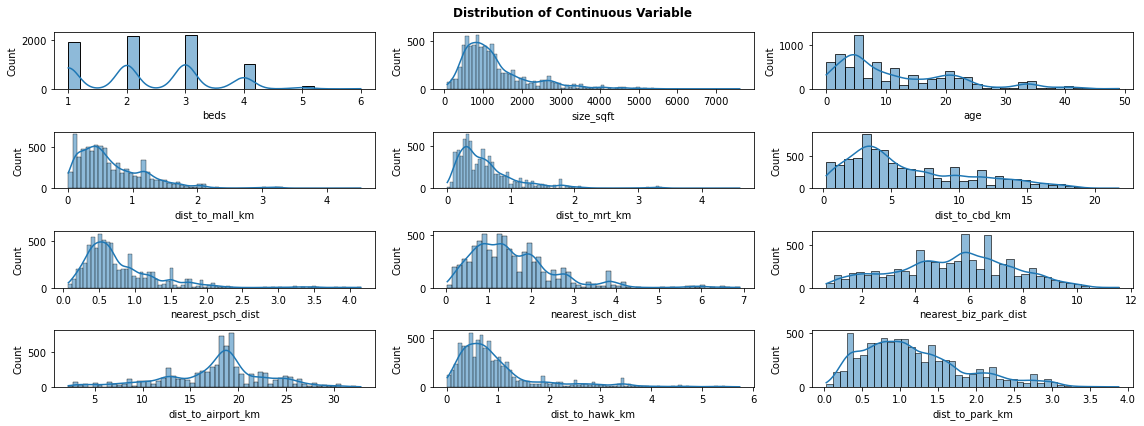

In [124]:
plotdistribution(condo_df_lr, numerical_cols, 'Distribution of Continuous Variable')

Most numeric features are highly skewed to the right. We need to transform all features to normal distribution before performing linear regression.

## <B> Baseline Model

In [35]:
# Separate dependent(target) variable and independent variables
X = condo_df_lr.drop(['rental_per_month_log'], axis = 1)
y = condo_df_lr['rental_per_month_log']

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

X_train_original = X_train.copy()
X_test_original = X_test.copy()

## <B> Standardisation on numerical columns

In [36]:
# Carry out standardization on numerical columns
scaler = StandardScaler() 
numerical_cols = ['beds', 'size_sqft', 'age', 'dist_to_mall_km', 
                  'dist_to_mrt_km','dist_to_cbd_km', 'nearest_psch_dist', 
                  'nearest_isch_dist', 'nearest_biz_park_dist', 'dist_to_airport_km',
                  'dist_to_hawk_km', 'dist_to_park_km']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])

In [37]:
X_train.head()

,beds,size_sqft,age,dist_to_mall_km,dist_to_mrt_km,dist_to_cbd_km,nearest_psch_dist,nearest_isch_dist,near_top30_psch_2km,nearest_biz_park_dist,...,district_D23,district_D25,district_D26,district_D27,district_D28,lease_Unknown,lease_more_than_12m,furnishing_Partially Furnished,furnishing_Unfurnished,furnishing_Unknown
4341,1.528934,1.536561,2.746159,-0.224667,0.286366,-0.519345,0.254290,-0.499866,1,-0.011878,...,0,0,0,0,0,0,1,1,0,0
4900,0.591564,1.853443,-0.875634,-0.558455,-0.448855,-0.601096,-0.268498,-0.653210,1,0.142432,...,0,0,0,0,0,0,0,1,0,0
1999,0.591564,1.276671,-0.976239,-0.595542,-0.568081,-0.923558,-0.617023,-0.949673,0,0.161137,...,0,0,0,0,0,0,1,1,0,0
5278,-0.345806,0.037638,-0.674423,-0.799524,-0.806531,-0.099235,-0.307223,-0.458975,0,1.577989,...,0,0,0,0,0,0,0,0,0,1
5432,1.528934,1.023621,0.935262,0.387276,0.326108,-0.448948,-0.171685,-0.162511,1,0.030206,...,0,0,0,0,0,0,1,0,0,1


In [38]:
# Instantiate a Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred_train = linear_reg.predict(X_train)

In [40]:
cdf = pd.DataFrame(linear_reg.coef_, X.columns, columns=['Coefficients'])
print(cdf.head(20))

                       Coefficients
beds                       0.167783
size_sqft                  0.306601
age                       -0.109373
dist_to_mall_km           -0.045392
dist_to_mrt_km             0.020453
dist_to_cbd_km            -0.146321
nearest_psch_dist          0.045488
nearest_isch_dist         -0.003408
near_top30_psch_2km        0.039244
nearest_biz_park_dist     -0.024205
dist_to_airport_km         0.017019
dist_to_hawk_km            0.001312
dist_to_park_km            0.019152
mrt_availability           0.076318
district_D02               0.185491
district_D03              -0.100138
district_D04               0.006617
district_D05              -0.164337
district_D06               0.151074
district_D07              -0.081764


In [41]:
# Model evaluation for -6 rows
print('R^2',metrics.r2_score(y_train, y_pred_train))
print('Adjusted R^2',1 - (1-metrics.r2_score(y_train, y_pred_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE',metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE',metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

R^2 0.8806338671340845
Adjusted R^2 0.8797181705812434
MAE 0.15010823930637132
MSE 0.04098970332813477
RMSE 0.20245913989774522


## <b>Performing ML Regression Checks

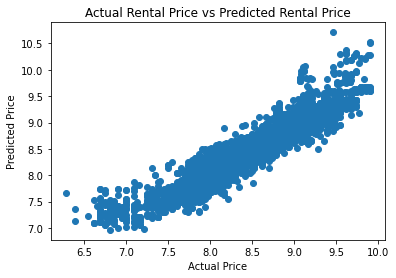

In [45]:
# Visualising actual prices vs predicted values
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Rental Price vs Predicted Rental Price")
plt.show()

<b>Multiple linear regression is based on the following assumptions:</b>
- A linear relationship between the dependent and independent variables
- The independent variables are not highly correlated with each other
- The variance of the residuals is constant
- Independence of observation
- Multivariate normality

### <b> Before dealing with non-linearity

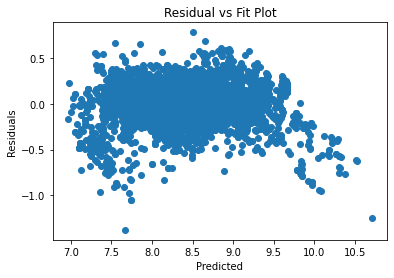

In [46]:
# Residual vs fit plot
plt.scatter(y_pred_train, y_train - y_pred_train)
plt.title("Residual vs Fit Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

We can see that the variance of the residuals increases as the predicted value increase. This is a sign of heteroscedasticity. If heteroscedasticity exists, the population used in the regression contains unequal variance, the analysis results may be invalid.

To fix heteroscedasticity, we take the log transform of the response variable (monthly rental price).

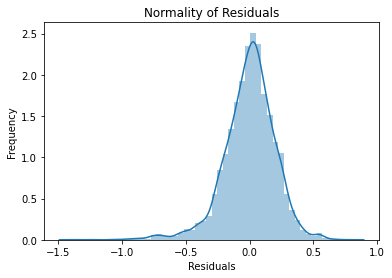

In [47]:
# Normality of residuals
sns.distplot(y_train-y_pred_train)
plt.title("Normality of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [177]:
numeric_cols = ['rental_per_month_log', 'beds', 'size_sqft', 'age', 'dist_to_mall_km', 
                  'dist_to_mrt_km','dist_to_cbd_km', 'nearest_psch_dist', 
                  'nearest_isch_dist', 'nearest_biz_park_dist', 'dist_to_airport_km',
                  'dist_to_hawk_km', 'dist_to_park_km']

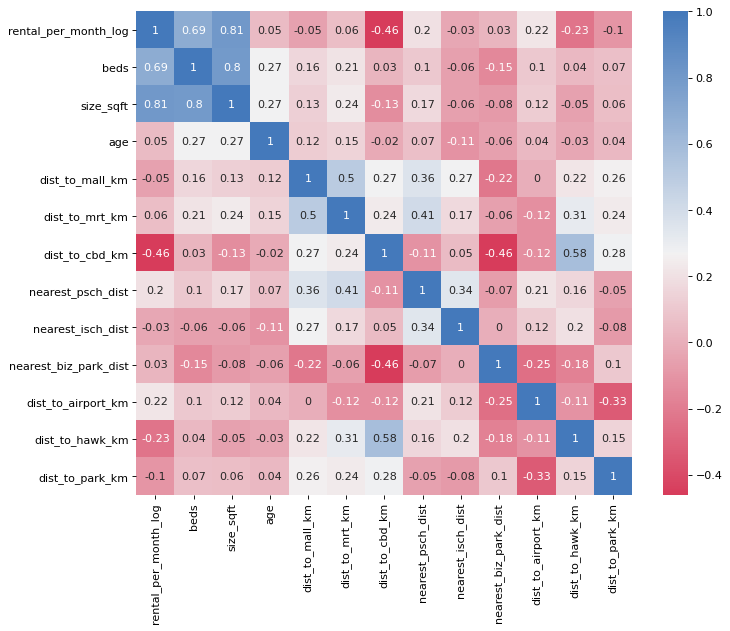

In [178]:
# Display heatmap
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)
corrMatrix = round(df[numeric_cols].corr(),2)
cmap=sns.diverging_palette(5, 250, as_cmap=True)
sns.heatmap(corrMatrix, annot=True, cmap=cmap)
plt.show()

In [51]:
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif.sort_values(by=['VIF'], ascending=False)
    return(vif)

In [54]:
numeric_cols = ['beds', 'size_sqft', 'age', 'dist_to_mall_km', 
                  'dist_to_mrt_km','dist_to_cbd_km', 'nearest_psch_dist', 
                  'nearest_isch_dist', 'nearest_biz_park_dist', 'dist_to_airport_km',
                  'dist_to_hawk_km', 'dist_to_park_km']
round(calc_vif(X_train[numeric_cols]),2).sort_values(by='VIF', ascending=False)

,variables,VIF
1,size_sqft,3.27
0,beds,3.05
5,dist_to_cbd_km,2.65
4,dist_to_mrt_km,1.78
10,dist_to_hawk_km,1.75
3,dist_to_mall_km,1.67
6,nearest_psch_dist,1.67
8,nearest_biz_park_dist,1.66
11,dist_to_park_km,1.39
9,dist_to_airport_km,1.33


No multi-collinearity detected as all numeric features have VIF < 5.

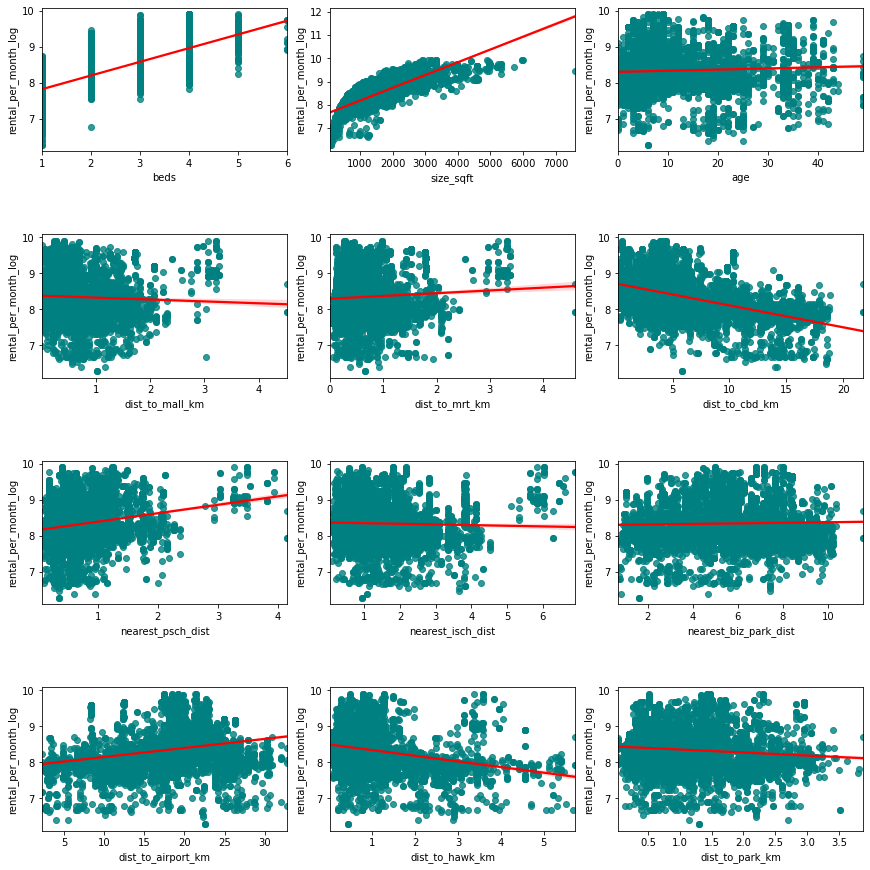

In [55]:
numeric_cols = ['beds', 'size_sqft', 'age', 'dist_to_mall_km', 
                  'dist_to_mrt_km','dist_to_cbd_km', 'nearest_psch_dist', 
                  'nearest_isch_dist', 'nearest_biz_park_dist', 'dist_to_airport_km',
                  'dist_to_hawk_km', 'dist_to_park_km']
X_plot = X.loc[:,numerical_cols]
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(12, 12))

axs = axs.flatten()
for i, k in enumerate(numerical_cols):
    sns.regplot(y=y, x=X_plot[k], ax=axs[i], scatter_kws={"color": "teal"}, line_kws={"color": "red"})
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [56]:
X_train.columns

Index(['beds', 'size_sqft', 'age', 'dist_to_mall_km', 'dist_to_mrt_km',
       'dist_to_cbd_km', 'nearest_psch_dist', 'nearest_isch_dist',
       'near_top30_psch_2km', 'nearest_biz_park_dist', 'dist_to_airport_km',
       'dist_to_hawk_km', 'dist_to_park_km', 'mrt_availability',
       'district_D02', 'district_D03', 'district_D04', 'district_D05',
       'district_D06', 'district_D07', 'district_D08', 'district_D09',
       'district_D10', 'district_D11', 'district_D12', 'district_D13',
       'district_D14', 'district_D15', 'district_D16', 'district_D17',
       'district_D18', 'district_D19', 'district_D20', 'district_D21',
       'district_D22', 'district_D23', 'district_D25', 'district_D26',
       'district_D27', 'district_D28', 'lease_Unknown', 'lease_more_than_12m',
       'furnishing_Partially Furnished', 'furnishing_Unfurnished',
       'furnishing_Unknown'],
      dtype='object')

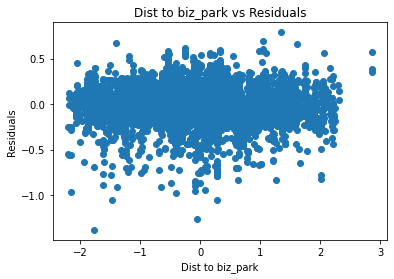

In [57]:
plt.scatter(X_train['nearest_biz_park_dist'], y_train-y_pred_train)
plt.title("Dist to biz_park vs Residuals")
plt.xlabel("Dist to biz_park")
plt.ylabel("Residuals")
plt.show()

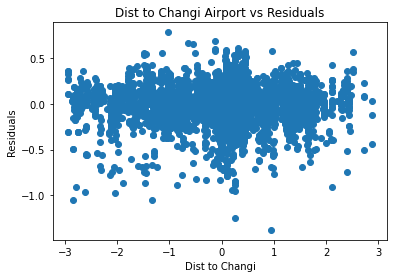

In [58]:
# Independence of X variables
plt.scatter(X_train['dist_to_airport_km'], y_train-y_pred_train)
plt.title("Dist to Changi Airport vs Residuals")
plt.xlabel("Dist to Changi")
plt.ylabel("Residuals")
plt.show()

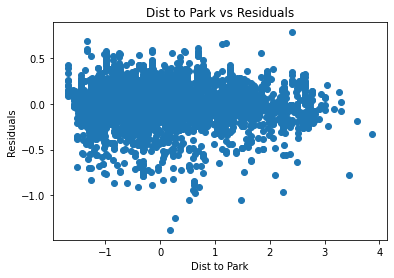

In [59]:
# Independence of X variables
plt.scatter(X_train['dist_to_park_km'], y_train-y_pred_train)
plt.title("Dist to Park vs Residuals")
plt.xlabel("Dist to Park")
plt.ylabel("Residuals")
plt.show()

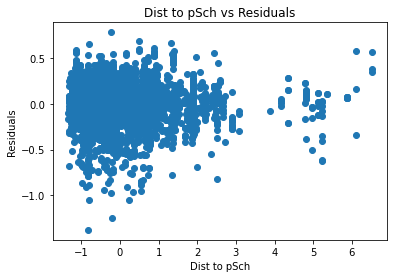

In [60]:
plt.scatter(X_train['nearest_psch_dist'], y_train-y_pred_train)
plt.title("Dist to pSch vs Residuals")
plt.xlabel("Dist to pSch")
plt.ylabel("Residuals")
plt.show()

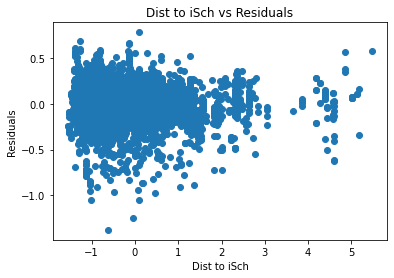

In [61]:
plt.scatter(X_train['nearest_isch_dist'], y_train-y_pred_train)
plt.title("Dist to iSch vs Residuals")
plt.xlabel("Dist to iSch")
plt.ylabel("Residuals")
plt.show()

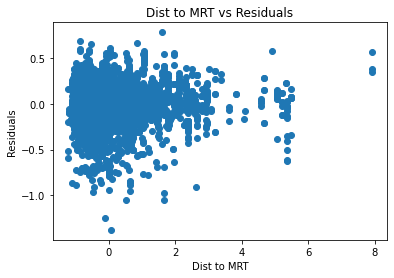

In [62]:
plt.scatter(X_train['dist_to_mrt_km'], y_train-y_pred_train)
plt.title("Dist to MRT vs Residuals")
plt.xlabel("Dist to MRT")
plt.ylabel("Residuals")
plt.show()

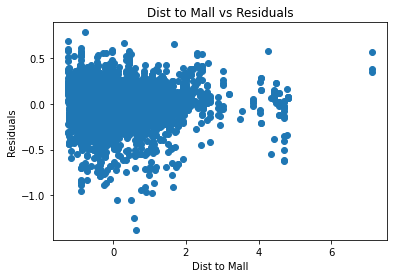

In [63]:
plt.scatter(X_train['dist_to_mall_km'], y_train-y_pred_train)
plt.title("Dist to Mall vs Residuals")
plt.xlabel("Dist to Mall")
plt.ylabel("Residuals")
plt.show()

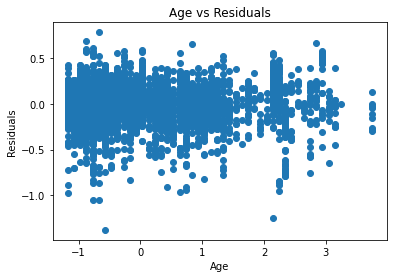

In [64]:
plt.scatter(X_train['age'], y_train-y_pred_train)
plt.title("Age vs Residuals")
plt.xlabel("Age")
plt.ylabel("Residuals")
plt.show()

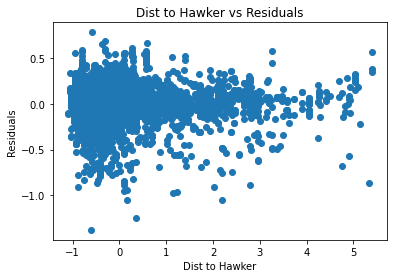

In [65]:
plt.scatter(X_train['dist_to_hawk_km'], y_train-y_pred_train)
plt.title("Dist to Hawker vs Residuals")
plt.xlabel("Dist to Hawker")
plt.ylabel("Residuals")
plt.show()

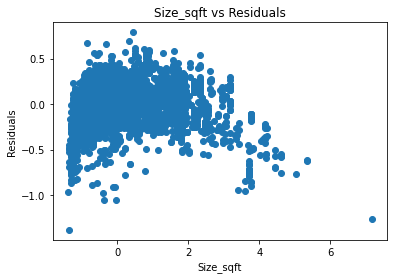

In [66]:
plt.scatter(X_train['size_sqft'], y_train-y_pred_train)
plt.title("Size_sqft vs Residuals")
plt.xlabel("Size_sqft")
plt.ylabel("Residuals")
plt.show()

The above sqft vs residuals plot seems to suggest some form of non-independence (residuals do not appear randomly and symmetrically distributed around zero under all conditions), which we should aim to resolve. We can try adding a polynomial term (sqft_squared) to the model.

### <b> After adding sqft^2 to deal with non-linearity of rental price

In [67]:
# Add sqft^2 (scaled) to deal with above non-linear band pattern
X_train_2 = X_train.copy()
X_train_2['sqft_squared'] = X_train_original['size_sqft'].apply(lambda x: x**2)
X_train_2[['sqft_squared']] = scaler.fit_transform(X_train_2[['sqft_squared']])
X_train_2.head()

,beds,size_sqft,age,dist_to_mall_km,dist_to_mrt_km,dist_to_cbd_km,nearest_psch_dist,nearest_isch_dist,near_top30_psch_2km,nearest_biz_park_dist,...,district_D25,district_D26,district_D27,district_D28,lease_Unknown,lease_more_than_12m,furnishing_Partially Furnished,furnishing_Unfurnished,furnishing_Unknown,sqft_squared
4341,1.528934,1.536561,2.746159,-0.224667,0.286366,-0.519345,0.254290,-0.499866,1,-0.011878,...,0,0,0,0,0,1,1,0,0,1.203710
4900,0.591564,1.853443,-0.875634,-0.558455,-0.448855,-0.601096,-0.268498,-0.653210,1,0.142432,...,0,0,0,0,0,0,1,0,0,1.613253
1999,0.591564,1.276671,-0.976239,-0.595542,-0.568081,-0.923558,-0.617023,-0.949673,0,0.161137,...,0,0,0,0,0,1,1,0,0,0.898295
5278,-0.345806,0.037638,-0.674423,-0.799524,-0.806531,-0.099235,-0.307223,-0.458975,0,1.577989,...,0,0,0,0,0,0,0,0,1,-0.180272
5432,1.528934,1.023621,0.935262,0.387276,0.326108,-0.448948,-0.171685,-0.162511,1,0.030206,...,0,0,0,0,0,1,0,0,1,0.627301


In [68]:
linear_reg.fit(X_train_2, y_train)
y_pred_train_2 = linear_reg.predict(X_train_2)

In [69]:
# Model evaluation
print('R^2',metrics.r2_score(y_train, y_pred_train_2))
print('Adjusted R^2',1 - (1-metrics.r2_score(y_train, y_pred_train_2))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE',metrics.mean_absolute_error(y_train, y_pred_train_2))
print('MSE',metrics.mean_squared_error(y_train, y_pred_train_2))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_2)))

R^2 0.9092481656587881
Adjusted R^2 0.9085519787264058
MAE 0.13169232061665992
MSE 0.03116370344600908
RMSE 0.176532443040958


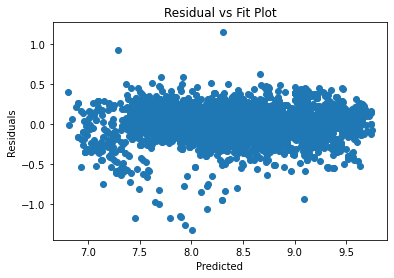

In [70]:
# Replot residual vs fit
plt.scatter(y_pred_train_2, y_train - y_pred_train_2)
plt.title("Residual vs Fit Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

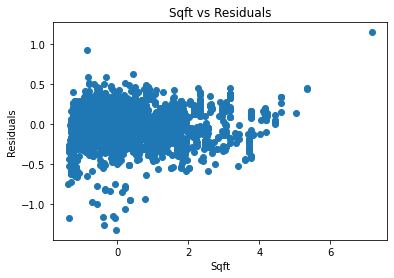

In [71]:
plt.scatter(X_train_2['size_sqft'], y_train-y_pred_train_2)
plt.title("Sqft vs Residuals")
plt.xlabel("Sqft")
plt.ylabel("Residuals")
plt.show()

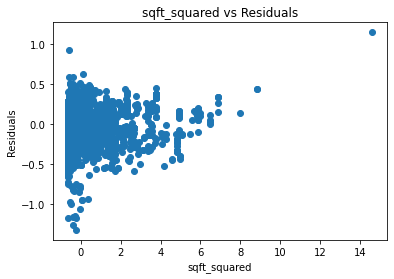

In [72]:
plt.scatter(X_train_2['sqft_squared'], y_train-y_pred_train_2)
plt.title("sqft_squared vs Residuals")
plt.xlabel("sqft_squared")
plt.ylabel("Residuals")
plt.show()

In [73]:
# Display coefficients (Indicator for feature importance)
linear_reg_features = pd.DataFrame([X_train_2.columns, linear_reg.coef_]).T
linear_reg_features = linear_reg_features.rename(columns={0: 'Feature', 1: 'Importance Score'})
linear_reg_features.sort_values(by='Importance Score', ascending = False).head(20)

,Feature,Importance Score
1,size_sqft,0.766176
14,district_D02,0.156437
13,mrt_availability,0.07263
18,district_D06,0.067139
0,beds,0.058495
22,district_D10,0.055134
8,near_top30_psch_2km,0.049185
6,nearest_psch_dist,0.035239
4,dist_to_mrt_km,0.022333
21,district_D09,0.022121


In [74]:
# Transform test set
X_test['sqft_squared'] = X_test_original['size_sqft'].apply(lambda x: x**2)
X_test[['sqft_squared']] = scaler.fit_transform(X_test[['sqft_squared']])

In [75]:
y_pred_test = linear_reg.predict(X_test)

In [76]:
# Store results as dataframe
lr_dict = {'Model':'Multi-Linear Regression',
          'R^2':metrics.r2_score(y_test, y_pred_test),
          'Adjusted R^2':(1 - (1-metrics.r2_score(y_test, y_pred_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),
          'MAE':metrics.mean_absolute_error(y_test, y_pred_test),
          'MSE':metrics.mean_squared_error(y_test, y_pred_test),
          'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))}

In [77]:
linear_reg_metrics = pd.DataFrame.from_dict(lr_dict, orient = 'index').T
linear_reg_metrics

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Multi-Linear Regression,0.897179,0.893874,0.141214,0.036591,0.191289


# <B> Random Forest Regressor

In [78]:
condo_df = df.copy()

# Generate dummy columns (while dropping first dummy col (drop_first = True))
condo_df = pd.get_dummies(condo_df, columns = ['district'], drop_first = True)
condo_df = pd.get_dummies(condo_df, columns = ['lease'], drop_first = True)
# condo_df = pd.get_dummies(condo_df, columns = ['nearest_mrt'], drop_first = True)
condo_df = pd.get_dummies(condo_df, columns = ['furnishing'], drop_first = True)
condo_df.head()

,rental_per_month_log,beds,size_sqft,age,nearest_mrt,dist_to_mall_km,dist_to_mrt_km,dist_to_cbd_km,nearest_psch_dist,nearest_isch_dist,...,district_D23,district_D25,district_D26,district_D27,district_D28,lease_Unknown,lease_more_than_12m,furnishing_Partially Furnished,furnishing_Unfurnished,furnishing_Unknown
0,6.684612,1,150,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,...,0,0,0,1,0,0,0,0,0,0
1,7.377759,1,250,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,...,0,0,0,1,0,0,1,1,0,0
2,6.684612,1,150,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,...,0,0,0,1,0,0,0,0,0,0
3,7.377759,1,250,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,...,0,0,0,1,0,0,1,1,0,0
4,6.684612,1,150,4,Canberra MRT Station,0.71,0.54,17.29,0.59,2.69,...,0,0,0,1,0,0,0,0,0,0


In [79]:
condo_df = condo_df.drop(['nearest_mrt'], axis = 1)

In [80]:
# Separate dependent(target) variable and independent variables
X = condo_df.drop(['rental_per_month_log'], axis = 1)
y = condo_df['rental_per_month_log']

In [81]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# X_train_original = X_train.copy()
# X_test_original = X_test.copy()

In [82]:
# Create the parameter grid for GridSearchCV
rf_param_grid = {
    'max_depth': [80, 90, 100], # Maximum number of levels in each decision tree
    'max_features': [2, 3], # Maximum number of features considered for splitting a node
    'min_samples_leaf': [1, 3, 4, 5], # Minimum number of data points allowed in a leaf node
    'n_estimators': [100, 300, 600] # Number of trees in the forest
}

In [83]:
# Instantiate a Random Forest Regressor
rf_reg = RandomForestRegressor(random_state = 123)

In [84]:
# Setup grid search
rf_grid = GridSearchCV(estimator = rf_reg, param_grid = rf_param_grid, cv=5, n_jobs=1, verbose=2)

In [85]:
# Fit the grid search model on training dataset
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=80, max_features=2, min_samples_leaf=1, n_estimators=100; total time=   1.0s
[CV] END max_depth=80, max_features=2, min_samples_leaf=1, n_estimators=100; total time=   0.8s
[CV] END max_depth=80, max_features=2, min_samples_leaf=1, n_estimators=100; total time=   0.6s
[CV] END max_depth=80, max_features=2, min_samples_leaf=1, n_estimators=100; total time=   0.7s
[CV] END max_depth=80, max_features=2, min_samples_leaf=1, n_estimators=100; total time=   0.6s
[CV] END max_depth=80, max_features=2, min_samples_leaf=1, n_estimators=300; total time=   2.2s
[CV] END max_depth=80, max_features=2, min_samples_leaf=1, n_estimators=300; total time=   2.1s
[CV] END max_depth=80, max_features=2, min_samples_leaf=1, n_estimators=300; total time=   2.1s
[CV] END max_depth=80, max_features=2, min_samples_leaf=1, n_estimators=300; total time=   2.0s
[CV] END max_depth=80, max_features=2, min_samples_leaf=1, n_estimators=30

[CV] END max_depth=80, max_features=3, min_samples_leaf=3, n_estimators=600; total time=   3.3s
[CV] END max_depth=80, max_features=3, min_samples_leaf=3, n_estimators=600; total time=   2.8s
[CV] END max_depth=80, max_features=3, min_samples_leaf=3, n_estimators=600; total time=   2.8s
[CV] END max_depth=80, max_features=3, min_samples_leaf=3, n_estimators=600; total time=   3.1s
[CV] END max_depth=80, max_features=3, min_samples_leaf=3, n_estimators=600; total time=   2.8s
[CV] END max_depth=80, max_features=3, min_samples_leaf=4, n_estimators=100; total time=   0.4s
[CV] END max_depth=80, max_features=3, min_samples_leaf=4, n_estimators=100; total time=   0.5s
[CV] END max_depth=80, max_features=3, min_samples_leaf=4, n_estimators=100; total time=   0.4s
[CV] END max_depth=80, max_features=3, min_samples_leaf=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=80, max_features=3, min_samples_leaf=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=80, max_features=3, m

[CV] END max_depth=90, max_features=2, min_samples_leaf=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, n_estimators=300; total time=   0.8s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, n_estimators=300; total time=   0.8s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, n_estimators=300; total time=   0.8s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, n_estimators=600; total time=   1.9s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, n_estimators=600; total time=   1.9s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, n_estimators=600; total time=   1.7s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, n_estimators=600; total time=   1.9s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, n_estimators=600; total time=   1.7s
[CV] END max_depth=90, max_features=3, min_samples_leaf=1, n_estimators=100; total time=   0.7s
[CV] END max_depth=90, max_features=3, m

[CV] END max_depth=100, max_features=2, min_samples_leaf=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, n_estimators=100; total time=   0.3s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, n_estimators=100; total time=   0.3s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, n_estimators=300; total time=   0.8s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, n_estimators=300; total time=   1.0s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, n_estimators=300; total time=   0.8s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, n_estimators=300; total time=   0.9s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, n_estimators=300; total time=   1.1s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, n_estimators=600; total time=   1.9s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, n_estimators=600; total time=   3.1s
[CV] END max_depth=100, max_fe

[CV] END max_depth=100, max_features=3, min_samples_leaf=4, n_estimators=600; total time=   2.1s
[CV] END max_depth=100, max_features=3, min_samples_leaf=4, n_estimators=600; total time=   2.0s
[CV] END max_depth=100, max_features=3, min_samples_leaf=4, n_estimators=600; total time=   2.0s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, n_estimators=300; total time=   1.0s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, n_estimators=300; total time=   1.0s
[CV] END max_depth=100, max_fe

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123), n_jobs=1,
             param_grid={'max_depth': [80, 90, 100], 'max_features': [2, 3],
                         'min_samples_leaf': [1, 3, 4, 5],
                         'n_estimators': [100, 300, 600]},
             verbose=2)

In [86]:
rf_grid.best_params_

{'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 1,
 'n_estimators': 300}

In [87]:
# Get best RF estimator based on best parameters
rf_best = rf_grid.best_estimator_

# Use RF regressor to predict on test set
y_pred_test = rf_best.predict(X_test)

In [88]:
# Store results as dataframe
rf_dict = {'Model':'Random Forest Regressor',
          'R^2':metrics.r2_score(y_test, y_pred_test),
          'Adjusted R^2':(1 - (1-metrics.r2_score(y_test, y_pred_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),
          'MAE':metrics.mean_absolute_error(y_test, y_pred_test),
          'MSE':metrics.mean_squared_error(y_test, y_pred_test),
          'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))}

rf_reg_metrics = pd.DataFrame.from_dict(rf_dict, orient = 'index').T

# Display model performance metrics
rf_reg_metrics

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Random Forest Regressor,0.950447,0.94889,0.08332,0.017635,0.132796


In [89]:
rf_best.feature_importances_

array([0.15238487, 0.26587341, 0.0309186 , 0.03528725, 0.02924736,
       0.08386708, 0.03767452, 0.03157038, 0.00818832, 0.03513368,
       0.06671798, 0.04505916, 0.03239181, 0.00575215, 0.00395937,
       0.00139017, 0.00535685, 0.00263649, 0.0003429 , 0.00056072,
       0.0008566 , 0.01459224, 0.02928709, 0.00187717, 0.00143292,
       0.00070068, 0.00285332, 0.00165453, 0.00154936, 0.00037203,
       0.00383481, 0.00576873, 0.00203083, 0.00130663, 0.00172317,
       0.00347846, 0.00166711, 0.00054411, 0.00392331, 0.00182927,
       0.00977797, 0.00518804, 0.0257085 , 0.00037042, 0.00335963])

In [90]:
# Sort importance in descending order
rf_features = pd.DataFrame([X_train.columns, rf_best.feature_importances_]).T
rf_features = rf_features.rename(columns={0: 'Feature', 1: 'Importance Score'})
rf_features.sort_values(by = 'Importance Score', ascending = False)

,Feature,Importance Score
1,size_sqft,0.265873
0,beds,0.152385
5,dist_to_cbd_km,0.083867
10,dist_to_airport_km,0.066718
11,dist_to_hawk_km,0.045059
6,nearest_psch_dist,0.037675
3,dist_to_mall_km,0.035287
9,nearest_biz_park_dist,0.035134
12,dist_to_park_km,0.032392
7,nearest_isch_dist,0.03157


# <B> XGBoost Regressor

In [92]:
condo_df_xg = df.copy()

# One-hot encoding of categorical variables
condo_df_xg = pd.get_dummies(condo_df_xg, columns = ['district'], drop_first = False) 
condo_df_xg = pd.get_dummies(condo_df_xg, columns = ['lease'], drop_first = False) 
condo_df_xg = pd.get_dummies(condo_df_xg, columns = ['furnishing'], drop_first = False) 
condo_df_xg = condo_df_xg.drop(['nearest_mrt'], axis = 1)

# Separate dependent(target) variable and independent variables
X = condo_df_xg.drop(['rental_per_month_log'], axis = 1)
y = condo_df_xg['rental_per_month_log']

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [94]:
xgb_param_grid = {"learning_rate": [0.05, 0.1, 0.2], # Step size shrinkage used in update to prevents overfitting.
                  "max_depth"        : [6, 8, 9, 10], # Maximum depth of a tree. 
                  "min_child_weight" : [1, 3, 5, 7], # Minimum number of instances required in a child node
                  "gamma"            : [0.0, 0.1, 0.2, 0.3], # Minimum loss reduction required to make a further partition on a leaf node of the tree.
                  "colsample_bytree" : [0.3, 0.4, 0.6, 0.8] # Number of features supplied to a tree
}

xgb_reg = xgb.XGBRegressor(seed = 123, objective ='reg:squarederror')

xgb_reg_grid = GridSearchCV(estimator = xgb_reg, param_grid = xgb_param_grid, cv=5, n_jobs=-1, verbose=2) 

In [95]:
xgb_reg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                 

In [96]:
xgb_reg_grid.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 3}

In [97]:
# Get best model (based on best parameters) and predict on test set
best_xgb_reg = xgb_reg_grid.best_estimator_
y_pred_test = best_xgb_reg.predict(X_test)

In [98]:
# Store results as dataframe
xgb_dict = {'Model':'XGBoost Regressor',
          'R^2':metrics.r2_score(y_test, y_pred_test),
          'Adjusted R^2':(1 - (1-metrics.r2_score(y_test, y_pred_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),
          'MAE':metrics.mean_absolute_error(y_test, y_pred_test),
          'MSE':metrics.mean_squared_error(y_test, y_pred_test),
          'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))}

# Display model performance metrics
xgb_metrics = pd.DataFrame.from_dict(xgb_dict, orient = 'index').T
xgb_metrics

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,XGBoost Regressor,0.970941,0.969965,0.064635,0.010341,0.101692


In [244]:
# Sort importance in descending order
xgb_features = pd.DataFrame([X_train.columns, best_xgb_reg.feature_importances_]).T
xgb_features = xgb_features.rename(columns={0: 'Feature', 1: 'Importance Score'})
xgb_features.sort_values(by = 'Importance Score', ascending = False).head(15)

,Feature,Importance Score
1,size_sqft,0.313096
0,beds,0.180023
5,nearest_psch_dist,0.140027
10,NaN,0.049272
39,NaN,0.038778
2,age,0.029952
16,NaN,0.027283
23,NaN,0.018717
3,dist_to_mall_km,0.014943
13,NaN,0.013747


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

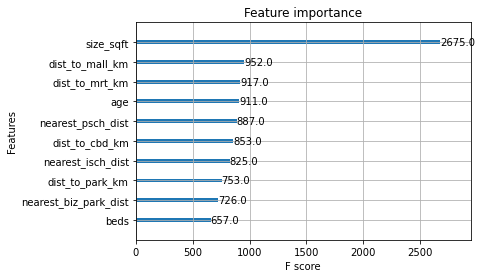

In [250]:
plot_importance(best_xgb_reg, max_num_features = 10)

# <B> CatBoost Regressor

In [107]:
condo_df_cb = df.copy()

# One-hot encoding of categorical variables
condo_df_cb = pd.get_dummies(condo_df_cb, columns = ['district'], drop_first = False) 
condo_df_cb = pd.get_dummies(condo_df_cb, columns = ['lease'], drop_first = False) 
condo_df_cb = pd.get_dummies(condo_df_cb, columns = ['furnishing'], drop_first = False) 
condo_df_cb = condo_df_cb.drop(['nearest_mrt'], axis = 1)

numerical_cols = ['beds', 'size_sqft', 'age', 'dist_to_mall_km', 
                  'dist_to_mrt_km','dist_to_cbd_km', 'nearest_psch_dist', 
                  'nearest_isch_dist', 'nearest_biz_park_dist', 'dist_to_airport_km',
                  'dist_to_hawk_km', 'dist_to_park_km']

# Separate dependent(target) variable and independent variables
X = condo_df_cb.drop(['rental_per_month_log'], axis = 1)
y = condo_df_cb['rental_per_month_log']

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [108]:
# initialize Pool
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test) 

In [109]:
catboost_param_grid = {'learning_rate': [0.03, 0.1, 0.15],
                        'depth': [4,6,8,9,10,11],
                        'l2_leaf_reg': [1, 3, 5]}

In [110]:
# Initiate CatBoost regressor instance
catboost_reg = CatBoostRegressor(random_seed = 123, iterations=100, loss_function='RMSE')

catboost_reg_grid = GridSearchCV(estimator = catboost_reg, param_grid = catboost_param_grid, cv=5, n_jobs=-1, verbose=2) 

catboost_reg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
0:	learn: 0.5172002	total: 423ms	remaining: 41.9s
1:	learn: 0.4563337	total: 452ms	remaining: 22.2s
2:	learn: 0.4076918	total: 480ms	remaining: 15.5s
3:	learn: 0.3616535	total: 506ms	remaining: 12.2s
4:	learn: 0.3225629	total: 527ms	remaining: 10s
5:	learn: 0.2894570	total: 544ms	remaining: 8.53s
6:	learn: 0.2623338	total: 562ms	remaining: 7.47s
7:	learn: 0.2396973	total: 580ms	remaining: 6.67s
8:	learn: 0.2205479	total: 598ms	remaining: 6.05s
9:	learn: 0.2052808	total: 616ms	remaining: 5.54s
10:	learn: 0.1908341	total: 633ms	remaining: 5.12s
11:	learn: 0.1799624	total: 651ms	remaining: 4.78s
12:	learn: 0.1710968	total: 672ms	remaining: 4.5s
13:	learn: 0.1637610	total: 688ms	remaining: 4.23s
14:	learn: 0.1561421	total: 704ms	remaining: 3.99s
15:	learn: 0.1504144	total: 722ms	remaining: 3.79s
16:	learn: 0.1451554	total: 742ms	remaining: 3.62s
17:	learn: 0.1411780	total: 769ms	remaining: 3.5s
18:	learn: 0.1376711	total: 787ms	

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001A5CA3A0820>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 9, 10, 11],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.03, 0.1, 0.15]},
             verbose=2)

In [111]:
catboost_reg_grid.best_params_

{'depth': 9, 'l2_leaf_reg': 1, 'learning_rate': 0.15}

In [112]:
best_catboost_reg = catboost_reg_grid.best_estimator_

# Make prediction
y_pred_test = best_catboost_reg.predict(X_test)

In [113]:
# Store results as dataframe
catboost_dict = {'Model':'CatBoost Regressor',
          'R^2':metrics.r2_score(y_test, y_pred_test),
          'Adjusted R^2':(1 - (1-metrics.r2_score(y_test, y_pred_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),
          'MAE':metrics.mean_absolute_error(y_test, y_pred_test),
          'MSE':metrics.mean_squared_error(y_test, y_pred_test),
          'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))}

catboost_metrics = pd.DataFrame.from_dict(catboost_dict, orient = 'index').T
catboost_metrics

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,CatBoost Regressor,0.96692,0.965808,0.074493,0.011772,0.108501


In [114]:
# Sort importance in descending order
catboost_features = pd.DataFrame([X_train.columns, best_catboost_reg.feature_importances_]).T
catboost_features = catboost_features.rename(columns={0: 'Feature', 1: 'Importance Score'})
catboost_features.sort_values(by = 'Importance Score', ascending = False).head(15)

,Feature,Importance Score
1,size_sqft,48.587066
5,dist_to_cbd_km,13.669244
2,age,9.666416
10,dist_to_airport_km,5.801815
3,dist_to_mall_km,4.000898
0,beds,3.78949
4,dist_to_mrt_km,2.33509
7,nearest_isch_dist,2.321682
11,dist_to_hawk_km,2.236676
6,nearest_psch_dist,1.851083


# <B> LightGBM Regressor

In [142]:
condo_df_gbm = df.copy()

# One-hot encoding of categorical variables
condo_df_gbm  = pd.get_dummies(condo_df_gbm , columns = ['district'], drop_first = False) 
condo_df_gbm  = pd.get_dummies(condo_df_gbm , columns = ['lease'], drop_first = False) 
condo_df_gbm  = pd.get_dummies(condo_df_gbm , columns = ['furnishing'], drop_first = False) 
condo_df_gbm = condo_df_gbm.drop(['nearest_mrt'], axis = 1)

# Separate dependent(target) variable and independent variables
X = condo_df_gbm .drop(['rental_per_month_log'], axis = 1)
y = condo_df_gbm ['rental_per_month_log']

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [143]:
gbm_param_grid = {'metric': ['rmse'],
                  'max_depth': [9,10,11,12,13], 
                  'bagging_fraction': [0.8, 0.9, 1],
                  'feature_fraction': [0.8, 0.9, 1],
                  'min_data_in_leaf': [20,50,80],
                  'learning_rate': [0.01,0.05,0.1,0.2]}

light_gbm_reg = lgb.LGBMRegressor(seed = 123, num_iterations = 1200)

light_gbm_grid = GridSearchCV(estimator = light_gbm_reg, param_grid = gbm_param_grid, cv=5, n_jobs=-1, verbose=1) 

light_gbm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


GridSearchCV(cv=5, estimator=LGBMRegressor(num_iterations=1200, seed=123),
             n_jobs=-1,
             param_grid={'bagging_fraction': [0.8, 0.9, 1],
                         'feature_fraction': [0.8, 0.9, 1],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [9, 10, 11, 12, 13], 'metric': ['rmse'],
                         'min_data_in_leaf': [20, 50, 80]},
             verbose=1)

In [144]:
light_gbm_grid.best_params_

{'bagging_fraction': 0.8,
 'feature_fraction': 0.9,
 'learning_rate': 0.05,
 'max_depth': 10,
 'metric': 'rmse',
 'min_data_in_leaf': 20}

In [145]:
best_light_gbm = light_gbm_grid.best_estimator_
y_pred_test = best_light_gbm.predict(X_test)

In [146]:
# Store results as dataframe
lgbm_dict = {'Model':'LightGBM Regressor',
          'R^2':metrics.r2_score(y_test, y_pred_test),
          'Adjusted R^2':(1 - (1-metrics.r2_score(y_test, y_pred_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),
          'MAE':metrics.mean_absolute_error(y_test, y_pred_test),
          'MSE':metrics.mean_squared_error(y_test, y_pred_test),
          'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))}

lgbm_metrics = pd.DataFrame.from_dict(lgbm_dict, orient = 'index').T

# Show model performance metrics
lgbm_metrics

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,LightGBM Regressor,0.971144,0.970175,0.065252,0.010269,0.101336


In [147]:
# Sort importance in descending order
lgb_features = pd.DataFrame([X_train.columns, best_light_gbm.feature_importances_]).T
lgb_features = lgb_features.rename(columns={0: 'Feature', 1: 'Importance Score'})
lgb_features.sort_values(by = 'Importance Score', ascending = False).head(15)

,Feature,Importance Score
1,size_sqft,8456
2,age,2498
3,dist_to_mall_km,2486
6,nearest_psch_dist,2426
4,dist_to_mrt_km,2305
11,dist_to_hawk_km,2259
7,nearest_isch_dist,2215
12,dist_to_park_km,2181
5,dist_to_cbd_km,1966
9,nearest_biz_park_dist,1957


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

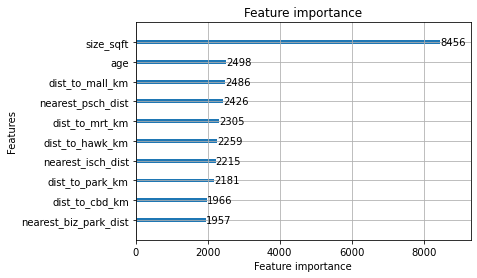

In [148]:
lgb.plot_importance(best_light_gbm, max_num_features = 10)

## <B> Compare models

In [115]:
df_metrics = pd.concat([linear_reg_metrics, rf_reg_metrics, xgb_metrics, lgbm_metrics, catboost_metrics])
df_metrics.sort_values(by = 'RMSE', ascending = True)

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,LightGBM Regressor,0.971144,0.970175,0.065252,0.010269,0.101336
0,XGBoost Regressor,0.970941,0.969965,0.064635,0.010341,0.101692
0,CatBoost Regressor,0.96692,0.965808,0.074493,0.011772,0.108501
0,Random Forest Regressor,0.950447,0.94889,0.08332,0.017635,0.132796
0,Multi-Linear Regression,0.897179,0.893874,0.141214,0.036591,0.191289


In [116]:
# Omitting CatBoost result
df_metrics = pd.concat([linear_reg_metrics, rf_reg_metrics, xgb_metrics, lgbm_metrics])
df_metrics.sort_values(by = 'RMSE', ascending = True)

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,LightGBM Regressor,0.971144,0.970175,0.065252,0.010269,0.101336
0,XGBoost Regressor,0.970941,0.969965,0.064635,0.010341,0.101692
0,Random Forest Regressor,0.950447,0.94889,0.08332,0.017635,0.132796
0,Multi-Linear Regression,0.897179,0.893874,0.141214,0.036591,0.191289


## <B> Refine best model

In [118]:
from feature_engine.selection import RecursiveFeatureElimination

In [149]:
best_light_gbm = light_gbm_grid.best_estimator_
sel = RecursiveFeatureElimination(
    variables=None, # automatically evaluate all numerical variables
    estimator = best_light_gbm, # best model
    scoring = 'neg_root_mean_squared_error', # metric used to evalute
    threshold = 0.002, # the maximum rmse drop allowed before removing a feature
    cv=5, # cross-validation
)

In [150]:
sel.fit(X_train, y_train);

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging

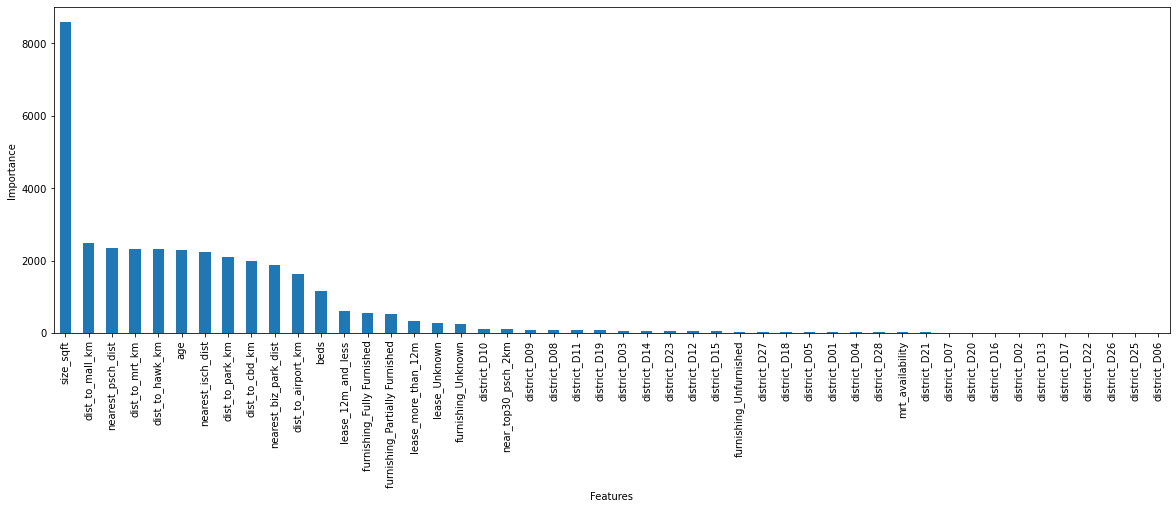

In [151]:
# importance of all features based of initial model
sel.feature_importances_.sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

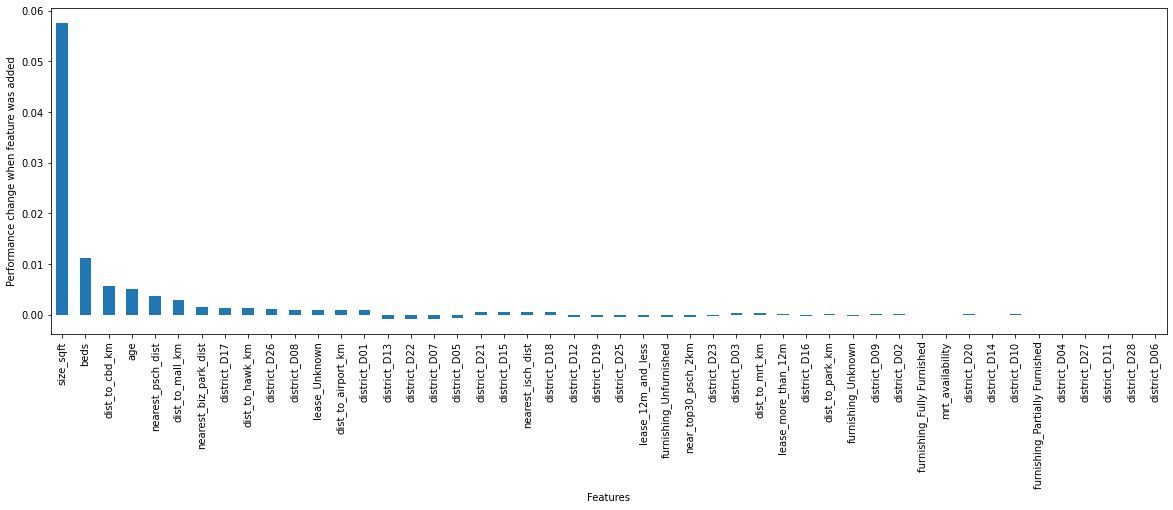

In [152]:
# we plot to find out how each of the feature influence the model performance
pd.Series(sel.performance_drifts_).sort_values(key=lambda x: abs(x), ascending=False).plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Performance change when feature was added')
plt.show()

In [153]:
sel.features_to_drop_

['dist_to_mrt_km',
 'nearest_isch_dist',
 'near_top30_psch_2km',
 'nearest_biz_park_dist',
 'dist_to_airport_km',
 'dist_to_hawk_km',
 'dist_to_park_km',
 'mrt_availability',
 'district_D01',
 'district_D02',
 'district_D03',
 'district_D04',
 'district_D05',
 'district_D06',
 'district_D07',
 'district_D08',
 'district_D09',
 'district_D10',
 'district_D11',
 'district_D12',
 'district_D13',
 'district_D14',
 'district_D15',
 'district_D16',
 'district_D17',
 'district_D18',
 'district_D19',
 'district_D20',
 'district_D21',
 'district_D22',
 'district_D23',
 'district_D25',
 'district_D26',
 'district_D27',
 'district_D28',
 'lease_12m_and_less',
 'lease_Unknown',
 'lease_more_than_12m',
 'furnishing_Fully Furnished',
 'furnishing_Partially Furnished',
 'furnishing_Unfurnished',
 'furnishing_Unknown']

In [154]:
# Number of features that will be removed
len(sel.features_to_drop_)

42

In [155]:
X_train = sel.transform(X_train)

In [156]:
#final selected feature
X_train.columns

Index(['beds', 'size_sqft', 'age', 'dist_to_mall_km', 'dist_to_cbd_km',
       'nearest_psch_dist'],
      dtype='object')

In [159]:
from sklearn.model_selection import cross_val_score
cross_val_score(best_light_gbm, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error').mean()

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging

-0.11313562921556757

<h1> <b>Final Hyperparameter Tuning</h1>
   

In [160]:
def objective(trial):

    eta = trial.suggest_float("eta", 1e-2, 0.3, log=True)
    reg_lambda = trial.suggest_loguniform("reg_lambda", 1e-8, 100)
    reg_alpha = trial.suggest_loguniform("reg_alpha", 1e-8, 100)
    subsample = trial.suggest_float("subsample", 0.1, 1)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.1, 1.0)
    max_depth = trial.suggest_int("max_depth", 1, 7)
    
    model = lgb.LGBMRegressor(random_state=123,
                         n_estimators = 200,
                         eta = eta,
                         reg_lambda = reg_lambda,
                         reg_alpha = reg_alpha,
                         subsample = subsample,
                         colsample_bytree = colsample_bytree,
                         max_depth = max_depth,
                         n_jobs=6
                         )

    score = cross_val_score(model, X_train, y_train, scoring = 'neg_root_mean_squared_error',  cv=10, verbose=1)
    mean_score = score.mean()
    std_score = score.std()
    
    accuracy = mean_score - std_score
    
    return accuracy

In [161]:
# sklearn neg_room_mean_square return results as negative. hence we should maximize instead
sampler = TPESampler(seed=123) 
study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials=100)

[I 2022-02-22 10:14:52,183] A new study created in memory with name: no-name-d460a505-bbd6-4621-bbb5-f8fdcec72e96
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.010505188675774622 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.010505188675774622 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.010505188675774622 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.010505188675774622 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.010505188675774622 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.010505188675774622 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.010505188675774622 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[I 2022-02-22 10:14:52,860] Trial 0 finished with value: -0.1616057820764333 and parameters: {'eta': 0.010505188675774622, 'reg_lambda': 5.699791135072116e-05, 'reg_alpha': 1.7462864670685142e-06, 'subsample': 0.1815872264068747, 'colsample_bytree': 0.21693984180643128, 'max_depth': 5}. Best is trial 0 with value: -0.1616057820764333.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.010505188675774622 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.010505188675774622 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.010505188675774622 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.012159040773451951 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.012159040773451951 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.012159040773451951 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.012159040773451951 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.012159040773451951 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.012159040773451951 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.012159040773451951 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.012159040773451951 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] lea

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[I 2022-02-22 10:14:53,267] Trial 1 finished with value: -0.20294667291412488 and parameters: {'eta': 0.012159040773451951, 'reg_lambda': 0.026043490375468624, 'reg_alpha': 41.58755743971856, 'subsample': 0.5155853141777711, 'colsample_bytree': 0.4072452241315846, 'max_depth': 4}. Best is trial 0 with value: -0.1616057820764333.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.26568564022752017 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.26568564022752017 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.26568564022752017 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.26568564022752017 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.26568564022752017 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.26568564022752017 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.26568564022752017 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.26568564022752017 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[I 2022-02-22 10:14:54,313] Trial 2 finished with value: -0.13245494725791374 and parameters: {'eta': 0.26568564022752017, 'reg_lambda': 27.23704126700296, 'reg_alpha': 2.9601032530319263e-08, 'subsample': 0.29101695627395174, 'colsample_bytree': 0.5060681824941548, 'max_depth': 7}. Best is trial 2 with value: -0.13245494725791374.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.03392439566239197 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.03392439566239197 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.03392439566239197 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.03392439566239197 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.03392439566239197 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.03392439566239197 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.03392439566239197 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.03392439566239197 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[I 2022-02-22 10:14:54,728] Trial 3 finished with value: -0.17183730020447183 and parameters: {'eta': 0.03392439566239197, 'reg_lambda': 1.4335210441064435e-08, 'reg_alpha': 2.287700579649647e-08, 'subsample': 0.49979578504935773, 'colsample_bytree': 0.23006939799199827, 'max_depth': 3}. Best is trial 2 with value: -0.13245494725791374.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20238829661067095 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20238829661067095 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20238829661067095 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20238829661067095 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20238829661067095 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20238829661067095 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20238829661067095 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20238829661067095 will be ignored. Current value: learning_rate=0.1

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[I 2022-02-22 10:14:55,007] Trial 4 finished with value: -0.1990520137391002 and parameters: {'eta': 0.20238829661067095, 'reg_lambda': 0.00046138930671095143, 'reg_alpha': 14.64993813071702, 'subsample': 0.16120152199734802, 'colsample_bytree': 0.6591944786134618, 'max_depth': 1}. Best is trial 2 with value: -0.13245494725791374.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20238829661067095 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20238829661067095 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.29784302448878563 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.29784302448878563 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.29784302448878563 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.29784302448878563 will be ignored. Current value: learning_rate=0.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.29784302448878563 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.29784302448878563 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.29784302448878563 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.29784302448878563 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.29784302448878563 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.29784302448878563 will be ignored. Current value: learning_rate=0.1

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[I 2022-02-22 10:14:55,362] Trial 5 finished with value: -0.17131276690553754 and parameters: {'eta': 0.29784302448878563, 'reg_lambda': 39.36484649003945, 'reg_alpha': 6.25355629524053e-06, 'subsample': 0.6751826040219211, 'colsample_bytree': 0.7171299252105018, 'max_depth': 2}. Best is trial 2 with value: -0.13245494725791374.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0271202792946458 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0271202792946458 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0271202792946458 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0271202792946458 will be ignored. Current value: learning_rate=0.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0271202792946458 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0271202792946458 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0271202792946458 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
[I 2022-02-22 10:14:55,903] Trial 6 finished with value: -0.13925344104995685 and parameters: {'eta': 0.0271202792946458, 'reg_lambda': 0.0003569333777466904, 'reg_alpha': 0.00048348658972830583, 'subsample': 0.34563234359836553, 'colsample_bytree': 0.7256738599089585, 'max_depth': 4}. Best is trial 2 with value: -0.13245494725791374.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0271202792946458 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0271202792946458 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0271202792946458 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.010490983004303593 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.010490983004303593 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.010490983004303593 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.010490983004303593 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.010490983004303593 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.010490983004303593 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.010490983004303593 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.010490983004303593 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.010490983004303593 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] lea

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished
[I 2022-02-22 10:14:56,606] Trial 7 finished with value: -0.16302837569423237 and parameters: {'eta': 0.010490983004303593, 'reg_lambda': 6.591907425894451e-07, 'reg_alpha': 0.8378345302163824, 'subsample': 0.40807515796936666, 'colsample_bytree': 0.23679530236393498, 'max_depth': 6}. Best is trial 2 with value: -0.13245494725791374.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2795041221505201 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2795041221505201 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2795041221505201 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2795041221505201 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2795041221505201 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2795041221505201 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2795041221505201 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2795041221505201 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is se

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished
[I 2022-02-22 10:14:57,317] Trial 8 finished with value: -0.13254563202882427 and parameters: {'eta': 0.2795041221505201, 'reg_lambda': 0.3437067251697154, 'reg_alpha': 0.000989785698579323, 'subsample': 0.3741699318483587, 'colsample_bytree': 0.7444115831135819, 'max_depth': 5}. Best is trial 2 with value: -0.13245494725791374.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16414843565529602 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16414843565529602 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16414843565529602 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16414843565529602 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16414843565529602 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16414843565529602 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16414843565529602 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16414843565529602 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished
[I 2022-02-22 10:14:58,010] Trial 9 finished with value: -0.13002289345938772 and parameters: {'eta': 0.16414843565529602, 'reg_lambda': 3.280900648777836e-07, 'reg_alpha': 0.08519905072170507, 'subsample': 0.5533093832059879, 'colsample_bytree': 0.8030166311043044, 'max_depth': 5}. Best is trial 9 with value: -0.13002289345938772.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16414843565529602 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16414843565529602 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10869724609708231 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10869724609708231 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10869724609708231 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10869724609708231 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10869724609708231 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10869724609708231 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10869724609708231 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10869724609708231 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[I 2022-02-22 10:14:59,046] Trial 10 finished with value: -0.12559595339149288 and parameters: {'eta': 0.10869724609708231, 'reg_lambda': 1.681563328934746e-06, 'reg_alpha': 0.11402632261413242, 'subsample': 0.9701253899169899, 'colsample_bytree': 0.9614859387404011, 'max_depth': 7}. Best is trial 10 with value: -0.12559595339149288.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10869724609708231 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10613996691384629 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10613996691384629 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10613996691384629 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10613996691384629 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10613996691384629 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10613996691384629 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10613996691384629 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10613996691384629 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[I 2022-02-22 10:15:00,060] Trial 11 finished with value: -0.1250544199084206 and parameters: {'eta': 0.10613996691384629, 'reg_lambda': 1.2071833029866376e-06, 'reg_alpha': 0.0900174798127902, 'subsample': 0.9869227834693637, 'colsample_bytree': 0.9456302664974048, 'max_depth': 7}. Best is trial 11 with value: -0.1250544199084206.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09434562732374273 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09434562732374273 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09434562732374273 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09434562732374273 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09434562732374273 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09434562732374273 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09434562732374273 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09434562732374273 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[I 2022-02-22 10:15:01,058] Trial 12 finished with value: -0.12481432466956721 and parameters: {'eta': 0.09434562732374273, 'reg_lambda': 6.562667760128216e-06, 'reg_alpha': 0.069254797230956, 'subsample': 0.9928579058516563, 'colsample_bytree': 0.9957654663369655, 'max_depth': 7}. Best is trial 12 with value: -0.12481432466956721.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08120648743779035 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08120648743779035 will be ignored. Current value: learning_rate=0.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08120648743779035 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08120648743779035 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08120648743779035 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08120648743779035 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08120648743779035 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08120648743779035 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08120648743779035 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08120648743779035 will be ignored. Current value: learning_rate=0.1

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[I 2022-02-22 10:15:02,023] Trial 13 finished with value: -0.1261556010770656 and parameters: {'eta': 0.08120648743779035, 'reg_lambda': 7.45463852099056e-06, 'reg_alpha': 0.01334895765257059, 'subsample': 0.9802835335518865, 'colsample_bytree': 0.9742875849002121, 'max_depth': 7}. Best is trial 12 with value: -0.12481432466956721.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06787262806995732 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06787262806995732 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06787262806995732 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06787262806995732 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06787262806995732 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06787262806995732 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06787262806995732 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06787262806995732 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06787262806995732 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[I 2022-02-22 10:15:02,984] Trial 14 finished with value: -0.13157305142525202 and parameters: {'eta': 0.06787262806995732, 'reg_lambda': 1.8716754805052713e-08, 'reg_alpha': 1.9251633639556744, 'subsample': 0.8202133500126181, 'colsample_bytree': 0.8673008171964617, 'max_depth': 6}. Best is trial 12 with value: -0.12481432466956721.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06787262806995732 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.043710186509291434 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.043710186509291434 will be ignored. Current value: learning_rate=0.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.043710186509291434 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.043710186509291434 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.043710186509291434 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.043710186509291434 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.043710186509291434 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.043710186509291434 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.043710186509291434 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.043710186509291434 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[I 2022-02-22 10:15:03,861] Trial 15 finished with value: -0.12685828071106126 and parameters: {'eta': 0.043710186509291434, 'reg_lambda': 0.01534211280250623, 'reg_alpha': 6.922963906646996e-05, 'subsample': 0.8388831077489518, 'colsample_bytree': 0.8874415257167411, 'max_depth': 6}. Best is trial 12 with value: -0.12481432466956721.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11883915104347663 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11883915104347663 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11883915104347663 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11883915104347663 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11883915104347663 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11883915104347663 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11883915104347663 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11883915104347663 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[I 2022-02-22 10:15:04,887] Trial 16 finished with value: -0.12912547793289006 and parameters: {'eta': 0.11883915104347663, 'reg_lambda': 1.9491363709658955e-05, 'reg_alpha': 0.01129108528447499, 'subsample': 0.8373939346326992, 'colsample_bytree': 0.5754642158769697, 'max_depth': 7}. Best is trial 12 with value: -0.12481432466956721.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10964928401759186 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10964928401759186 will be ignored. Current value: learning_rate=0.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10964928401759186 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10964928401759186 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10964928401759186 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10964928401759186 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10964928401759186 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10964928401759186 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10964928401759186 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[I 2022-02-22 10:15:05,808] Trial 17 finished with value: -0.12712517647146035 and parameters: {'eta': 0.10964928401759186, 'reg_lambda': 2.482319178103561e-07, 'reg_alpha': 0.008661604871310537, 'subsample': 0.6692610106884305, 'colsample_bytree': 0.9745194457559864, 'max_depth': 6}. Best is trial 12 with value: -0.12481432466956721.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10964928401759186 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.056371521838486864 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.056371521838486864 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.056371521838486864 will be ignored. Current value: learning_rate=0.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.056371521838486864 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.056371521838486864 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.056371521838486864 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.056371521838486864 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.056371521838486864 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.056371521838486864 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.056371521838486864 will be ignored. Current value: learning_rate=0.1

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[I 2022-02-22 10:15:06,419] Trial 18 finished with value: -0.15186192431997492 and parameters: {'eta': 0.056371521838486864, 'reg_lambda': 5.9707603043332314e-05, 'reg_alpha': 1.0131356294743668, 'subsample': 0.9145527411767498, 'colsample_bytree': 0.8616346036322997, 'max_depth': 3}. Best is trial 12 with value: -0.12481432466956721.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.017989090794810935 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.017989090794810935 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.017989090794810935 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.017989090794810935 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.017989090794810935 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.017989090794810935 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.017989090794810935 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.017989090794810935 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished
[I 2022-02-22 10:15:07,236] Trial 19 finished with value: -0.13189262650759154 and parameters: {'eta': 0.017989090794810935, 'reg_lambda': 0.00468100624584392, 'reg_alpha': 7.464815395082905e-05, 'subsample': 0.7244938918760777, 'colsample_bytree': 0.6073311986852985, 'max_depth': 5}. Best is trial 12 with value: -0.12481432466956721.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.017989090794810935 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.017989090794810935 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14960951349267382 will be ignored. Current value: learning_rate=0.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14960951349267382 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14960951349267382 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14960951349267382 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14960951349267382 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14960951349267382 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14960951349267382 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14960951349267382 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14960951349267382 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished
[I 2022-02-22 10:15:08,097] Trial 20 finished with value: -0.15973672987993565 and parameters: {'eta': 0.14960951349267382, 'reg_lambda': 7.238019161032166e-08, 'reg_alpha': 0.148048939961612, 'subsample': 0.7509545118130638, 'colsample_bytree': 0.10439558548803296, 'max_depth': 7}. Best is trial 12 with value: -0.12481432466956721.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14960951349267382 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08999569404612616 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08999569404612616 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08999569404612616 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08999569404612616 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08999569404612616 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08999569404612616 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08999569404612616 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08999569404612616 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08999569404612616 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[I 2022-02-22 10:15:09,096] Trial 21 finished with value: -0.1252090360615134 and parameters: {'eta': 0.08999569404612616, 'reg_lambda': 3.4170393892597394e-06, 'reg_alpha': 0.08747188929227806, 'subsample': 0.9583283124476264, 'colsample_bytree': 0.9887447133300427, 'max_depth': 7}. Best is trial 12 with value: -0.12481432466956721.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08999569404612616 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08116007508438502 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08116007508438502 will be ignored. Current value: learning_rate=0.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08116007508438502 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08116007508438502 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08116007508438502 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08116007508438502 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08116007508438502 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08116007508438502 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08116007508438502 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[I 2022-02-22 10:15:10,036] Trial 22 finished with value: -0.1420159520881908 and parameters: {'eta': 0.08116007508438502, 'reg_lambda': 4.4487054919175594e-06, 'reg_alpha': 3.9337163784637035, 'subsample': 0.8977669010069953, 'colsample_bytree': 0.9912105334672898, 'max_depth': 6}. Best is trial 12 with value: -0.12481432466956721.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08116007508438502 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09079763923043795 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09079763923043795 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09079763923043795 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09079763923043795 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09079763923043795 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09079763923043795 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09079763923043795 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09079763923043795 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09079763923043795 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished
[I 2022-02-22 10:15:11,281] Trial 23 finished with value: -0.1267987962220138 and parameters: {'eta': 0.09079763923043795, 'reg_lambda': 8.517767084981033e-05, 'reg_alpha': 0.02534438783172085, 'subsample': 0.9904621837919398, 'colsample_bytree': 0.897330716082559, 'max_depth': 7}. Best is trial 12 with value: -0.12481432466956721.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09079763923043795 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05007547579954457 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05007547579954457 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05007547579954457 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05007547579954457 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05007547579954457 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05007547579954457 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05007547579954457 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05007547579954457 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[I 2022-02-22 10:15:12,307] Trial 24 finished with value: -0.12569335625890724 and parameters: {'eta': 0.05007547579954457, 'reg_lambda': 2.3761695381608728e-06, 'reg_alpha': 0.24285370140921694, 'subsample': 0.9134514477347373, 'colsample_bytree': 0.811602526947357, 'max_depth': 6}. Best is trial 12 with value: -0.12481432466956721.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05007547579954457 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14134618958488998 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14134618958488998 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14134618958488998 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14134618958488998 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14134618958488998 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14134618958488998 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14134618958488998 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14134618958488998 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[I 2022-02-22 10:15:13,282] Trial 25 finished with value: -0.1263146504241396 and parameters: {'eta': 0.14134618958488998, 'reg_lambda': 9.302424543140275e-08, 'reg_alpha': 0.001983766504418798, 'subsample': 0.7745980231041092, 'colsample_bytree': 0.923903395333282, 'max_depth': 7}. Best is trial 12 with value: -0.12481432466956721.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14134618958488998 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14134618958488998 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06605596260582663 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06605596260582663 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06605596260582663 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06605596260582663 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06605596260582663 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06605596260582663 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06605596260582663 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[I 2022-02-22 10:15:13,939] Trial 26 finished with value: -0.15158195911846092 and parameters: {'eta': 0.06605596260582663, 'reg_lambda': 1.942047995128984e-05, 'reg_alpha': 6.525563031412832, 'subsample': 0.9055399050041604, 'colsample_bytree': 0.7900477168248183, 'max_depth': 6}. Best is trial 12 with value: -0.12481432466956721.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06605596260582663 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06605596260582663 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06605596260582663 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20338909239025582 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20338909239025582 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20338909239025582 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20338909239025582 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20338909239025582 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20338909239025582 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20338909239025582 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20338909239025582 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[I 2022-02-22 10:15:14,986] Trial 27 finished with value: -0.12955912379144077 and parameters: {'eta': 0.20338909239025582, 'reg_lambda': 0.002524402215207601, 'reg_alpha': 0.0024265577473277784, 'subsample': 0.6648692555713611, 'colsample_bytree': 0.5084007586127591, 'max_depth': 7}. Best is trial 12 with value: -0.12481432466956721.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20338909239025582 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.03799010238408007 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.03799010238408007 will be ignored. Current value: learning_rate=0.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.03799010238408007 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.03799010238408007 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.03799010238408007 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.03799010238408007 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.03799010238408007 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.03799010238408007 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.03799010238408007 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.03799010238408007 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished
[I 2022-02-22 10:15:15,815] Trial 28 finished with value: -0.1304032518519747 and parameters: {'eta': 0.03799010238408007, 'reg_lambda': 1.4287020918658778e-06, 'reg_alpha': 0.380634196964155, 'subsample': 0.9986993785294583, 'colsample_bytree': 0.9940854229310342, 'max_depth': 5}. Best is trial 12 with value: -0.12481432466956721.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06512502661892683 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06512502661892683 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06512502661892683 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06512502661892683 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06512502661892683 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06512502661892683 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06512502661892683 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06512502661892683 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished
[I 2022-02-22 10:15:16,564] Trial 29 finished with value: -0.1303855591925558 and parameters: {'eta': 0.06512502661892683, 'reg_lambda': 0.00012861617752061495, 'reg_alpha': 0.00019835362617727487, 'subsample': 0.8669790441947636, 'colsample_bytree': 0.8415375957186103, 'max_depth': 5}. Best is trial 12 with value: -0.12481432466956721.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06512502661892683 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09405515208001818 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09405515208001818 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09405515208001818 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09405515208001818 will be ignored. Current value: learning_rate=0.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09405515208001818 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09405515208001818 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09405515208001818 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09405515208001818 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09405515208001818 will be ignored. Current value: learning_rate=0.1

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[I 2022-02-22 10:15:16,973] Trial 30 finished with value: -0.2116231915503556 and parameters: {'eta': 0.09405515208001818, 'reg_lambda': 1.4572883056818395e-05, 'reg_alpha': 51.792243523079904, 'subsample': 0.5897557031094396, 'colsample_bytree': 0.4050321820914662, 'max_depth': 3}. Best is trial 12 with value: -0.12481432466956721.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09405515208001818 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11024747178513551 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11024747178513551 will be ignored. Current value: learning_rate=0.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11024747178513551 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11024747178513551 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11024747178513551 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11024747178513551 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11024747178513551 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11024747178513551 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11024747178513551 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished
[I 2022-02-22 10:15:18,048] Trial 31 finished with value: -0.1266682266190078 and parameters: {'eta': 0.11024747178513551, 'reg_lambda': 1.430014019262104e-06, 'reg_alpha': 0.024999321217593268, 'subsample': 0.9561864570785865, 'colsample_bytree': 0.9364740289933524, 'max_depth': 7}. Best is trial 12 with value: -0.12481432466956721.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11024747178513551 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12641937253626254 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12641937253626254 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12641937253626254 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12641937253626254 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12641937253626254 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12641937253626254 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12641937253626254 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12641937253626254 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12641937253626254 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[I 2022-02-22 10:15:19,090] Trial 32 finished with value: -0.1254244928660341 and parameters: {'eta': 0.12641937253626254, 'reg_lambda': 7.762019547675234e-08, 'reg_alpha': 0.06106174228949561, 'subsample': 0.9458720004323553, 'colsample_bytree': 0.9351148355708484, 'max_depth': 7}. Best is trial 12 with value: -0.12481432466956721.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18197244150300407 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18197244150300407 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18197244150300407 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18197244150300407 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18197244150300407 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18197244150300407 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18197244150300407 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18197244150300407 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[I 2022-02-22 10:15:20,017] Trial 33 finished with value: -0.1265342089126477 and parameters: {'eta': 0.18197244150300407, 'reg_lambda': 1.1542627722264243e-07, 'reg_alpha': 0.037181169868655946, 'subsample': 0.9355908550038194, 'colsample_bytree': 0.91429359867112, 'max_depth': 6}. Best is trial 12 with value: -0.12481432466956721.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18197244150300407 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13377479392878266 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13377479392878266 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13377479392878266 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13377479392878266 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13377479392878266 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13377479392878266 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13377479392878266 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13377479392878266 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13377479392878266 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished
[I 2022-02-22 10:15:21,127] Trial 34 finished with value: -0.13764693976505962 and parameters: {'eta': 0.13377479392878266, 'reg_lambda': 2.3989646901197966e-08, 'reg_alpha': 0.005432601870265931, 'subsample': 0.7802146629370558, 'colsample_bytree': 0.4081728346780209, 'max_depth': 7}. Best is trial 12 with value: -0.12481432466956721.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2118210910895185 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2118210910895185 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2118210910895185 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2118210910895185 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2118210910895185 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2118210910895185 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2118210910895185 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2118210910895185 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2118210910895185 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2118210910895185 will be ignored. Current value: learning_rate=0.1

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[I 2022-02-22 10:15:21,746] Trial 35 finished with value: -0.16711001361856637 and parameters: {'eta': 0.2118210910895185, 'reg_lambda': 0.6381349890117326, 'reg_alpha': 13.087804381994754, 'subsample': 0.26135772195839746, 'colsample_bytree': 0.9228596673733049, 'max_depth': 7}. Best is trial 12 with value: -0.12481432466956721.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08192037190908376 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08192037190908376 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08192037190908376 will be ignored. Current value: learning_rate=0.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08192037190908376 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08192037190908376 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08192037190908376 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08192037190908376 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08192037190908376 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08192037190908376 will be ignored. Current value: learning_rate=0.1

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[I 2022-02-22 10:15:22,372] Trial 36 finished with value: -0.1404846858538897 and parameters: {'eta': 0.08192037190908376, 'reg_lambda': 6.0225998143258e-08, 'reg_alpha': 0.5340986324897238, 'subsample': 0.10766794364348548, 'colsample_bytree': 0.6723383447335984, 'max_depth': 4}. Best is trial 12 with value: -0.12481432466956721.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08192037190908376 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2351291022679412 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2351291022679412 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2351291022679412 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2351291022679412 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2351291022679412 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2351291022679412 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2351291022679412 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2351291022679412 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2351291022679412 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2351291022679412 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[I 2022-02-22 10:15:22,673] Trial 37 finished with value: -0.1922969595591231 and parameters: {'eta': 0.2351291022679412, 'reg_lambda': 3.8334113991315016e-07, 'reg_alpha': 7.831358647927446e-06, 'subsample': 0.8660239725680658, 'colsample_bytree': 0.7721826652002949, 'max_depth': 1}. Best is trial 12 with value: -0.12481432466956721.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.132721309673839 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.132721309673839 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.132721309673839 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.132721309673839 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.132721309673839 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.132721309673839 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.132721309673839 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.132721309673839 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[I 2022-02-22 10:15:23,595] Trial 38 finished with value: -0.12793254536483617 and parameters: {'eta': 0.132721309673839, 'reg_lambda': 0.0005020643119060253, 'reg_alpha': 0.05105284187624103, 'subsample': 0.8102337277057421, 'colsample_bytree': 0.8288702678035527, 'max_depth': 6}. Best is trial 12 with value: -0.12481432466956721.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.132721309673839 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.132721309673839 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.02954801996412403 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.02954801996412403 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.02954801996412403 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.02954801996412403 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.02954801996412403 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.02954801996412403 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[I 2022-02-22 10:15:23,957] Trial 39 finished with value: -0.16616224317035116 and parameters: {'eta': 0.02954801996412403, 'reg_lambda': 8.055365115765799e-06, 'reg_alpha': 0.003350131193434066, 'subsample': 0.9417579265174693, 'colsample_bytree': 0.6800542026291821, 'max_depth': 2}. Best is trial 12 with value: -0.12481432466956721.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.02954801996412403 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.02954801996412403 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.02954801996412403 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.02954801996412403 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09882827361863472 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09882827361863472 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09882827361863472 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09882827361863472 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09882827361863472 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09882827361863472 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09882827361863472 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09882827361863472 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09882827361863472 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished
[I 2022-02-22 10:15:24,813] Trial 40 finished with value: -0.12791056372595078 and parameters: {'eta': 0.09882827361863472, 'reg_lambda': 1.094203970339398e-08, 'reg_alpha': 1.279391849442274e-07, 'subsample': 0.4508513431502279, 'colsample_bytree': 0.997071742698706, 'max_depth': 6}. Best is trial 12 with value: -0.12481432466956721.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11729979725033661 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11729979725033661 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11729979725033661 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11729979725033661 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11729979725033661 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11729979725033661 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11729979725033661 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11729979725033661 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished
[I 2022-02-22 10:15:25,902] Trial 41 finished with value: -0.12434884301065814 and parameters: {'eta': 0.11729979725033661, 'reg_lambda': 6.089654297865359e-07, 'reg_alpha': 0.1342496622855608, 'subsample': 0.9503328874412411, 'colsample_bytree': 0.9366117339961424, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.173678706582871 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.173678706582871 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.173678706582871 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.173678706582871 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.173678706582871 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.173678706582871 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.173678706582871 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.173678706582871 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, e

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[I 2022-02-22 10:15:26,943] Trial 42 finished with value: -0.12514956030733448 and parameters: {'eta': 0.173678706582871, 'reg_lambda': 7.260733057477797e-07, 'reg_alpha': 0.19001852581553005, 'subsample': 0.8806168627557083, 'colsample_bytree': 0.9534324831708445, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.17251781256765963 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.17251781256765963 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.17251781256765963 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.17251781256765963 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.17251781256765963 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.17251781256765963 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.17251781256765963 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.17251781256765963 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[I 2022-02-22 10:15:27,903] Trial 43 finished with value: -0.13369896866961328 and parameters: {'eta': 0.17251781256765963, 'reg_lambda': 1.0963607826037835e-06, 'reg_alpha': 2.520255226229648, 'subsample': 0.8716270802952869, 'colsample_bytree': 0.8798039570814254, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.17251781256765963 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.17251781256765963 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1601627020438658 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1601627020438658 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1601627020438658 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1601627020438658 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1601627020438658 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1601627020438658 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1601627020438658 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1601627020438658 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is se

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[I 2022-02-22 10:15:28,949] Trial 44 finished with value: -0.12613337992320045 and parameters: {'eta': 0.1601627020438658, 'reg_lambda': 3.259927175933603e-07, 'reg_alpha': 0.25876625843019485, 'subsample': 0.994284647630296, 'colsample_bytree': 0.9581449314100778, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.07229312040380775 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.07229312040380775 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.07229312040380775 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.07229312040380775 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.07229312040380775 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.07229312040380775 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.07229312040380775 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.07229312040380775 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished
[I 2022-02-22 10:15:30,064] Trial 45 finished with value: -0.12656154974194225 and parameters: {'eta': 0.07229312040380775, 'reg_lambda': 2.5146109421323964e-05, 'reg_alpha': 1.1249570194905851, 'subsample': 0.9064366324102401, 'colsample_bytree': 0.7629754811939132, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2437706877943564 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2437706877943564 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2437706877943564 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2437706877943564 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2437706877943564 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2437706877943564 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2437706877943564 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2437706877943564 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is se

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished
[I 2022-02-22 10:15:31,146] Trial 46 finished with value: -0.12709920183353457 and parameters: {'eta': 0.2437706877943564, 'reg_lambda': 2.989357217803052e-06, 'reg_alpha': 0.0005805160496493545, 'subsample': 0.9598376703342368, 'colsample_bytree': 0.8576677714033849, 'max_depth': 6}. Best is trial 41 with value: -0.12434884301065814.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2437706877943564 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10593805260474004 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10593805260474004 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10593805260474004 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10593805260474004 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10593805260474004 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10593805260474004 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10593805260474004 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished
[I 2022-02-22 10:15:31,858] Trial 47 finished with value: -0.17580305982289227 and parameters: {'eta': 0.10593805260474004, 'reg_lambda': 0.00020408973196252186, 'reg_alpha': 21.262936535987155, 'subsample': 0.8540085639857445, 'colsample_bytree': 0.951052249418652, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10593805260474004 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10593805260474004 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10593805260474004 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0582336097579561 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0582336097579561 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0582336097579561 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0582336097579561 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0582336097579561 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0582336097579561 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0582336097579561 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0582336097579561 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is se

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished
[I 2022-02-22 10:15:33,024] Trial 48 finished with value: -0.12695823917760168 and parameters: {'eta': 0.0582336097579561, 'reg_lambda': 5.402812500871765e-07, 'reg_alpha': 0.09980450005829722, 'subsample': 0.80500909534494, 'colsample_bytree': 0.8863832350142632, 'max_depth': 6}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08526103251380647 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08526103251380647 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08526103251380647 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08526103251380647 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08526103251380647 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08526103251380647 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08526103251380647 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08526103251380647 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished
[I 2022-02-22 10:15:33,756] Trial 49 finished with value: -0.1392374166236389 and parameters: {'eta': 0.08526103251380647, 'reg_lambda': 5.619919825555693e-06, 'reg_alpha': 0.45354418489680404, 'subsample': 0.6052669456261958, 'colsample_bytree': 0.7076324250651017, 'max_depth': 4}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18385590936938367 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18385590936938367 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18385590936938367 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18385590936938367 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18385590936938367 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18385590936938367 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18385590936938367 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18385590936938367 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s finished
[I 2022-02-22 10:15:35,156] Trial 50 finished with value: -0.1378784304230185 and parameters: {'eta': 0.18385590936938367, 'reg_lambda': 0.30753503493878137, 'reg_alpha': 0.013636513164795801, 'subsample': 0.7084519554710458, 'colsample_bytree': 0.3255226396805787, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12651157090936424 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12651157090936424 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12651157090936424 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12651157090936424 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12651157090936424 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12651157090936424 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12651157090936424 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12651157090936424 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.6s finished
[I 2022-02-22 10:15:36,926] Trial 51 finished with value: -0.12493060075440429 and parameters: {'eta': 0.12651157090936424, 'reg_lambda': 3.318983282676695e-08, 'reg_alpha': 0.09566554712440056, 'subsample': 0.9376339856299767, 'colsample_bytree': 0.9416658666473049, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12053934193034922 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12053934193034922 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12053934193034922 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12053934193034922 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12053934193034922 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12053934193034922 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12053934193034922 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12053934193034922 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s finished
[I 2022-02-22 10:15:38,852] Trial 52 finished with value: -0.12446218206544513 and parameters: {'eta': 0.12053934193034922, 'reg_lambda': 3.293792090879577e-08, 'reg_alpha': 0.095766839882048, 'subsample': 0.9615475270428728, 'colsample_bytree': 0.9698897441550043, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12502347416569298 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12502347416569298 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12502347416569298 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12502347416569298 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12502347416569298 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12502347416569298 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12502347416569298 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12502347416569298 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.9s finished
[I 2022-02-22 10:15:40,928] Trial 53 finished with value: -0.12986755879589537 and parameters: {'eta': 0.12502347416569298, 'reg_lambda': 1.7325199872665603e-07, 'reg_alpha': 1.8154576468357235, 'subsample': 0.8847176205825452, 'colsample_bytree': 0.9540589564310705, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12502347416569298 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15014860530785532 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15014860530785532 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15014860530785532 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15014860530785532 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15014860530785532 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15014860530785532 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15014860530785532 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15014860530785532 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s finished
[I 2022-02-22 10:15:42,400] Trial 54 finished with value: -0.12700629141830116 and parameters: {'eta': 0.15014860530785532, 'reg_lambda': 4.020664983193447e-08, 'reg_alpha': 0.1606861611744244, 'subsample': 0.9306309300323652, 'colsample_bytree': 0.8481520223950441, 'max_depth': 6}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11330474880735139 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11330474880735139 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11330474880735139 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11330474880735139 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11330474880735139 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11330474880735139 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11330474880735139 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11330474880735139 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished
[I 2022-02-22 10:15:44,001] Trial 55 finished with value: -0.12536022318526704 and parameters: {'eta': 0.11330474880735139, 'reg_lambda': 3.169473317416913e-08, 'reg_alpha': 0.01972296805587713, 'subsample': 0.9755257170909449, 'colsample_bytree': 0.8973713787685281, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11330474880735139 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.016156758351252427 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.016156758351252427 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.016156758351252427 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.016156758351252427 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.016156758351252427 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.016156758351252427 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.016156758351252427 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.016156758351252427 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.016156758351252427 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished
[I 2022-02-22 10:15:45,648] Trial 56 finished with value: -0.12572774875449694 and parameters: {'eta': 0.016156758351252427, 'reg_lambda': 6.82437207342429e-07, 'reg_alpha': 0.7604009057313966, 'subsample': 0.9998969233173952, 'colsample_bytree': 0.9629723758985059, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.016156758351252427 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15328500231646564 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15328500231646564 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15328500231646564 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15328500231646564 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15328500231646564 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15328500231646564 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15328500231646564 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15328500231646564 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s finished
[I 2022-02-22 10:15:47,072] Trial 57 finished with value: -0.1290634112004642 and parameters: {'eta': 0.15328500231646564, 'reg_lambda': 1.60532049738042e-07, 'reg_alpha': 0.006656559692172778, 'subsample': 0.9230202507389664, 'colsample_bytree': 0.6223307421934549, 'max_depth': 6}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10146477710676732 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10146477710676732 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10146477710676732 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10146477710676732 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10146477710676732 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10146477710676732 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10146477710676732 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10146477710676732 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[I 2022-02-22 10:15:48,036] Trial 58 finished with value: -0.1553685629600567 and parameters: {'eta': 0.10146477710676732, 'reg_lambda': 1.6041576564045592e-08, 'reg_alpha': 7.789269520009786, 'subsample': 0.8353606820292911, 'colsample_bytree': 0.8101103851999795, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0736987094816377 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0736987094816377 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0736987094816377 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0736987094816377 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0736987094816377 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0736987094816377 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0736987094816377 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.0736987094816377 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is se

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished
[I 2022-02-22 10:15:49,211] Trial 59 finished with value: -0.13018494398364988 and parameters: {'eta': 0.0736987094816377, 'reg_lambda': 2.1319091835413893e-07, 'reg_alpha': 0.16045303153521784, 'subsample': 0.8920305344595203, 'colsample_bytree': 0.9127753869406701, 'max_depth': 5}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.27209357058876293 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.27209357058876293 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.27209357058876293 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.27209357058876293 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.27209357058876293 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.27209357058876293 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.27209357058876293 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.27209357058876293 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s finished
[I 2022-02-22 10:15:50,617] Trial 60 finished with value: -0.12696484023216556 and parameters: {'eta': 0.27209357058876293, 'reg_lambda': 4.3243507285840756e-08, 'reg_alpha': 0.00113712448204715, 'subsample': 0.9630184658422017, 'colsample_bytree': 0.8721308817341824, 'max_depth': 6}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09034527788229736 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09034527788229736 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09034527788229736 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09034527788229736 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09034527788229736 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09034527788229736 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09034527788229736 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09034527788229736 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.9s finished
[I 2022-02-22 10:15:52,659] Trial 61 finished with value: -0.12577734517242725 and parameters: {'eta': 0.09034527788229736, 'reg_lambda': 4.1084253346821544e-05, 'reg_alpha': 0.0542997586590114, 'subsample': 0.9608173028979384, 'colsample_bytree': 0.9976905298485368, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12471166262014098 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12471166262014098 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12471166262014098 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12471166262014098 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12471166262014098 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12471166262014098 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12471166262014098 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12471166262014098 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished
[I 2022-02-22 10:15:54,484] Trial 62 finished with value: -0.12532329855618138 and parameters: {'eta': 0.12471166262014098, 'reg_lambda': 9.31634737343742e-06, 'reg_alpha': 0.07808848151510142, 'subsample': 0.9235761124065824, 'colsample_bytree': 0.9571240751762786, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12471166262014098 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.07619653226900591 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.07619653226900591 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.07619653226900591 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.07619653226900591 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.07619653226900591 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.07619653226900591 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.07619653226900591 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.07619653226900591 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.2s finished
[I 2022-02-22 10:15:56,862] Trial 63 finished with value: -0.1253754812217581 and parameters: {'eta': 0.07619653226900591, 'reg_lambda': 8.193117063686753e-07, 'reg_alpha': 0.2663480854670155, 'subsample': 0.8889755985203466, 'colsample_bytree': 0.9750451101937772, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13743739220094342 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13743739220094342 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13743739220094342 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13743739220094342 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13743739220094342 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13743739220094342 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13743739220094342 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13743739220094342 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.7s finished
[I 2022-02-22 10:16:00,715] Trial 64 finished with value: -0.12723865087891958 and parameters: {'eta': 0.13743739220094342, 'reg_lambda': 2.668628715881618e-06, 'reg_alpha': 0.03088025816061049, 'subsample': 0.9660725820387319, 'colsample_bytree': 0.9125843083861306, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09813944315043548 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09813944315043548 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09813944315043548 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09813944315043548 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09813944315043548 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09813944315043548 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09813944315043548 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09813944315043548 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.6s finished
[I 2022-02-22 10:16:03,440] Trial 65 finished with value: -0.13096406776319627 and parameters: {'eta': 0.09813944315043548, 'reg_lambda': 4.6040782380677773e-07, 'reg_alpha': 1.500758669527584, 'subsample': 0.8452963291153561, 'colsample_bytree': 0.9328426656232319, 'max_depth': 6}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.047077731624376784 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.047077731624376784 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.047077731624376784 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.047077731624376784 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.047077731624376784 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.047077731624376784 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.047077731624376784 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.047077731624376784 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] lea

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.6s finished
[I 2022-02-22 10:16:05,214] Trial 66 finished with value: -0.1263053681593357 and parameters: {'eta': 0.047077731624376784, 'reg_lambda': 4.100625174017382e-06, 'reg_alpha': 0.014350130674640664, 'subsample': 0.9401954629384419, 'colsample_bytree': 0.9963494664561312, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1146923507600575 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1146923507600575 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1146923507600575 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1146923507600575 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1146923507600575 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1146923507600575 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1146923507600575 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1146923507600575 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is se

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.6s finished
[I 2022-02-22 10:16:06,987] Trial 67 finished with value: -0.13967843945622724 and parameters: {'eta': 0.1146923507600575, 'reg_lambda': 1.770912452988311e-06, 'reg_alpha': 3.6761210743318578, 'subsample': 0.9993278312151431, 'colsample_bytree': 0.8289193017526384, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18162463710319518 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18162463710319518 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18162463710319518 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18162463710319518 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18162463710319518 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18162463710319518 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18162463710319518 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18162463710319518 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.3s finished
[I 2022-02-22 10:16:09,484] Trial 68 finished with value: -0.12552265096016924 and parameters: {'eta': 0.18162463710319518, 'reg_lambda': 1.084408307060391e-07, 'reg_alpha': 0.11435148828397487, 'subsample': 0.7894190168771901, 'colsample_bytree': 0.8996225906886427, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08874100156433655 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08874100156433655 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08874100156433655 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08874100156433655 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08874100156433655 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08874100156433655 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08874100156433655 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.08874100156433655 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.9s finished
[I 2022-02-22 10:16:11,511] Trial 69 finished with value: -0.12901914733567862 and parameters: {'eta': 0.08874100156433655, 'reg_lambda': 5.926558145752728, 'reg_alpha': 0.5714496158982336, 'subsample': 0.7494075710239886, 'colsample_bytree': 0.9348820702268373, 'max_depth': 6}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16486665261610048 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16486665261610048 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16486665261610048 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16486665261610048 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16486665261610048 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16486665261610048 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16486665261610048 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16486665261610048 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished
[I 2022-02-22 10:16:13,364] Trial 70 finished with value: -0.12723439549152005 and parameters: {'eta': 0.16486665261610048, 'reg_lambda': 1.921584669335735e-08, 'reg_alpha': 0.0049549612642386396, 'subsample': 0.9070919553052926, 'colsample_bytree': 0.9785019366107977, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12526427941886295 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12526427941886295 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12526427941886295 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12526427941886295 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12526427941886295 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12526427941886295 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12526427941886295 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.12526427941886295 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.4s finished
[I 2022-02-22 10:16:17,876] Trial 71 finished with value: -0.12549806606866432 and parameters: {'eta': 0.12526427941886295, 'reg_lambda': 7.683576790654444e-06, 'reg_alpha': 0.05253564640425232, 'subsample': 0.9327484973728704, 'colsample_bytree': 0.9589541442412124, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14173028340675367 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14173028340675367 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14173028340675367 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14173028340675367 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14173028340675367 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14173028340675367 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14173028340675367 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14173028340675367 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.8s finished
[I 2022-02-22 10:16:20,864] Trial 72 finished with value: -0.1257457472123923 and parameters: {'eta': 0.14173028340675367, 'reg_lambda': 1.0012381559270956e-05, 'reg_alpha': 0.08545010255016222, 'subsample': 0.9711048427672263, 'colsample_bytree': 0.9542855707248966, 'max_depth': 7}. Best is trial 41 with value: -0.12434884301065814.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11677001216390932 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11677001216390932 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11677001216390932 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11677001216390932 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11677001216390932 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11677001216390932 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11677001216390932 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11677001216390932 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.4s finished
[I 2022-02-22 10:16:23,377] Trial 73 finished with value: -0.12418105541852037 and parameters: {'eta': 0.11677001216390932, 'reg_lambda': 1.6227385710109807e-06, 'reg_alpha': 0.2564819861757337, 'subsample': 0.8726036868909238, 'colsample_bytree': 0.8675449621034709, 'max_depth': 7}. Best is trial 73 with value: -0.12418105541852037.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1044177020147148 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1044177020147148 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1044177020147148 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1044177020147148 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1044177020147148 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1044177020147148 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1044177020147148 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1044177020147148 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is se

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished
[I 2022-02-22 10:16:25,260] Trial 74 finished with value: -0.12433208739323844 and parameters: {'eta': 0.1044177020147148, 'reg_lambda': 8.971387700349254e-07, 'reg_alpha': 0.28213144613088936, 'subsample': 0.8766140839757214, 'colsample_bytree': 0.8713499572274366, 'max_depth': 7}. Best is trial 73 with value: -0.12418105541852037.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.21099832266781418 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.21099832266781418 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.21099832266781418 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.21099832266781418 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.21099832266781418 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.21099832266781418 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.21099832266781418 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.21099832266781418 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.6s finished
[I 2022-02-22 10:16:27,028] Trial 75 finished with value: -0.12427176036058284 and parameters: {'eta': 0.21099832266781418, 'reg_lambda': 8.834658308712683e-07, 'reg_alpha': 0.2881930668642055, 'subsample': 0.8330987983760492, 'colsample_bytree': 0.784636949221412, 'max_depth': 7}. Best is trial 73 with value: -0.12418105541852037.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06240639211924713 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06240639211924713 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06240639211924713 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06240639211924713 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06240639211924713 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06240639211924713 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06240639211924713 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.06240639211924713 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.6s finished
[I 2022-02-22 10:16:28,748] Trial 76 finished with value: -0.12632300440898678 and parameters: {'eta': 0.06240639211924713, 'reg_lambda': 3.3217515069130836e-07, 'reg_alpha': 0.30102581011604884, 'subsample': 0.8260957619253454, 'colsample_bytree': 0.8624320029183505, 'max_depth': 6}. Best is trial 73 with value: -0.12418105541852037.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.21282215700035284 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.21282215700035284 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.21282215700035284 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.21282215700035284 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.21282215700035284 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.21282215700035284 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.21282215700035284 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.21282215700035284 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.4s finished
[I 2022-02-22 10:16:31,309] Trial 77 finished with value: -0.1281238802824512 and parameters: {'eta': 0.21282215700035284, 'reg_lambda': 1.0815392904729056e-06, 'reg_alpha': 0.791883950721428, 'subsample': 0.32199401274573347, 'colsample_bytree': 0.7366124358781259, 'max_depth': 7}. Best is trial 73 with value: -0.12418105541852037.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2982708654442794 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2982708654442794 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2982708654442794 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2982708654442794 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2982708654442794 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2982708654442794 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2982708654442794 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2982708654442794 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is se

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished
[I 2022-02-22 10:16:32,113] Trial 78 finished with value: -0.2278107979372043 and parameters: {'eta': 0.2982708654442794, 'reg_lambda': 8.639402508930505e-08, 'reg_alpha': 87.1240048848672, 'subsample': 0.8589151879885318, 'colsample_bytree': 0.7896355542059456, 'max_depth': 7}. Best is trial 73 with value: -0.12418105541852037.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2982708654442794 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10661789554204609 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10661789554204609 will be ignored. Current value: learning_rate=0.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10661789554204609 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10661789554204609 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10661789554204609 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10661789554204609 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10661789554204609 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10661789554204609 will be ignored. Current value: learning_rate=0.1

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[I 2022-02-22 10:16:32,797] Trial 79 finished with value: -0.16688425984097865 and parameters: {'eta': 0.10661789554204609, 'reg_lambda': 1.0597276105598169e-08, 'reg_alpha': 0.032545829035134734, 'subsample': 0.4955506192076549, 'colsample_bytree': 0.8988696653394822, 'max_depth': 2}. Best is trial 73 with value: -0.12418105541852037.



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10661789554204609 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.10661789554204609 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1959827736981046 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1959827736981046 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1959827736981046 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1959827736981046 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1959827736981046 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1959827736981046 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1959827736981046 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1959827736981046 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is se

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s finished
[I 2022-02-22 10:16:34,231] Trial 80 finished with value: -0.14166474664777448 and parameters: {'eta': 0.1959827736981046, 'reg_lambda': 3.367155389307926e-05, 'reg_alpha': 3.815638412625648, 'subsample': 0.2328381470337269, 'colsample_bytree': 0.8751668512306038, 'max_depth': 6}. Best is trial 73 with value: -0.12418105541852037.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11834271185861876 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11834271185861876 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11834271185861876 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11834271185861876 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11834271185861876 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11834271185861876 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11834271185861876 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11834271185861876 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished
[I 2022-02-22 10:16:36,045] Trial 81 finished with value: -0.1252481648188271 and parameters: {'eta': 0.11834271185861876, 'reg_lambda': 7.859382656367552e-07, 'reg_alpha': 0.18883792614059797, 'subsample': 0.8982230024195315, 'colsample_bytree': 0.8360448040599971, 'max_depth': 7}. Best is trial 73 with value: -0.12418105541852037.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2329673125140912 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2329673125140912 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2329673125140912 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2329673125140912 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2329673125140912 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2329673125140912 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2329673125140912 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2329673125140912 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is se

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished
[I 2022-02-22 10:16:37,863] Trial 82 finished with value: -0.12463565685209908 and parameters: {'eta': 0.2329673125140912, 'reg_lambda': 1.9105433505921418e-06, 'reg_alpha': 0.4556310461364949, 'subsample': 0.8835079926923045, 'colsample_bytree': 0.9176259328407324, 'max_depth': 7}. Best is trial 73 with value: -0.12418105541852037.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22984179034470736 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22984179034470736 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22984179034470736 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22984179034470736 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22984179034470736 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22984179034470736 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22984179034470736 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22984179034470736 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.6s finished
[I 2022-02-22 10:16:39,627] Trial 83 finished with value: -0.12461328980230109 and parameters: {'eta': 0.22984179034470736, 'reg_lambda': 3.7062354528430566e-06, 'reg_alpha': 0.4137874434349439, 'subsample': 0.9798593503082755, 'colsample_bytree': 0.908420597600778, 'max_depth': 7}. Best is trial 73 with value: -0.12418105541852037.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2566668598488798 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2566668598488798 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2566668598488798 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2566668598488798 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2566668598488798 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2566668598488798 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2566668598488798 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2566668598488798 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is se

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s finished
[I 2022-02-22 10:16:41,534] Trial 84 finished with value: -0.12523476659502888 and parameters: {'eta': 0.2566668598488798, 'reg_lambda': 1.83936208084689e-06, 'reg_alpha': 0.4094793837215079, 'subsample': 0.8697162349522716, 'colsample_bytree': 0.9207414488387768, 'max_depth': 7}. Best is trial 73 with value: -0.12418105541852037.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2566668598488798 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22632114264530762 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22632114264530762 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22632114264530762 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22632114264530762 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22632114264530762 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22632114264530762 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22632114264530762 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22632114264530762 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.9s finished
[I 2022-02-22 10:16:43,629] Trial 85 finished with value: -0.12694510658825742 and parameters: {'eta': 0.22632114264530762, 'reg_lambda': 8.018824567106918e-05, 'reg_alpha': 0.8673619096352638, 'subsample': 0.8033435217270058, 'colsample_bytree': 0.8057738504065406, 'max_depth': 7}. Best is trial 73 with value: -0.12418105541852037.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22632114264530762 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2498859574090681 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2498859574090681 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2498859574090681 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2498859574090681 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2498859574090681 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2498859574090681 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2498859574090681 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2498859574090681 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is se

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.9s finished
[I 2022-02-22 10:16:45,707] Trial 86 finished with value: -0.12868705305005593 and parameters: {'eta': 0.2498859574090681, 'reg_lambda': 1.4397588984939367e-05, 'reg_alpha': 1.6493753980535657, 'subsample': 0.9471933279058582, 'colsample_bytree': 0.8774564993128297, 'max_depth': 7}. Best is trial 73 with value: -0.12418105541852037.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2156454703343162 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2156454703343162 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2156454703343162 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2156454703343162 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2156454703343162 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2156454703343162 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2156454703343162 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2156454703343162 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is se

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.9s finished
[I 2022-02-22 10:16:47,750] Trial 87 finished with value: -0.12432204028350917 and parameters: {'eta': 0.2156454703343162, 'reg_lambda': 4.6266600168560775e-06, 'reg_alpha': 0.4308452795571346, 'subsample': 0.9183130209519408, 'colsample_bytree': 0.7699259369974942, 'max_depth': 7}. Best is trial 73 with value: -0.12418105541852037.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.19353838984262753 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.19353838984262753 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.19353838984262753 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.19353838984262753 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.19353838984262753 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.19353838984262753 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.19353838984262753 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.19353838984262753 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished
[I 2022-02-22 10:16:49,339] Trial 88 finished with value: -0.1259602518898768 and parameters: {'eta': 0.19353838984262753, 'reg_lambda': 4.81113311402457e-06, 'reg_alpha': 1.0723303916584853e-08, 'subsample': 0.9111910741954048, 'colsample_bytree': 0.7829841309752015, 'max_depth': 7}. Best is trial 73 with value: -0.12418105541852037.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22949408329060159 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22949408329060159 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22949408329060159 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22949408329060159 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22949408329060159 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22949408329060159 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22949408329060159 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22949408329060159 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.6s finished
[I 2022-02-22 10:16:51,062] Trial 89 finished with value: -0.1393761611718007 and parameters: {'eta': 0.22949408329060159, 'reg_lambda': 2.8405878129243757e-06, 'reg_alpha': 2.6899022760991014, 'subsample': 0.8376630342786084, 'colsample_bytree': 0.5280261076393896, 'max_depth': 7}. Best is trial 73 with value: -0.12418105541852037.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22095061652782666 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22095061652782666 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22095061652782666 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22095061652782666 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22095061652782666 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22095061652782666 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22095061652782666 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.22095061652782666 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished
[I 2022-02-22 10:16:52,723] Trial 90 finished with value: -0.12873935180961762 and parameters: {'eta': 0.22095061652782666, 'reg_lambda': 0.001870025146085733, 'reg_alpha': 0.48490622244230625, 'subsample': 0.9802686994777577, 'colsample_bytree': 0.7104715140677711, 'max_depth': 6}. Best is trial 73 with value: -0.12418105541852037.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.27925314154449826 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.27925314154449826 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.27925314154449826 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.27925314154449826 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.27925314154449826 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.27925314154449826 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.27925314154449826 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.27925314154449826 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished
[I 2022-02-22 10:16:54,602] Trial 91 finished with value: -0.1250573785510563 and parameters: {'eta': 0.27925314154449826, 'reg_lambda': 1.8647674913682467e-07, 'reg_alpha': 0.13703749123386813, 'subsample': 0.9237481735201809, 'colsample_bytree': 0.8439163316035846, 'max_depth': 7}. Best is trial 73 with value: -0.12418105541852037.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.27925314154449826 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16574763509913562 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16574763509913562 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16574763509913562 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16574763509913562 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16574763509913562 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16574763509913562 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16574763509913562 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.16574763509913562 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s finished
[I 2022-02-22 10:16:56,503] Trial 92 finished with value: -0.12520119409768732 and parameters: {'eta': 0.16574763509913562, 'reg_lambda': 1.4509079378303488e-06, 'reg_alpha': 0.29895188134256745, 'subsample': 0.9475392907180136, 'colsample_bytree': 0.8162037964416382, 'max_depth': 7}. Best is trial 73 with value: -0.12418105541852037.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14665021782593982 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14665021782593982 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14665021782593982 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14665021782593982 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14665021782593982 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14665021782593982 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14665021782593982 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.14665021782593982 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished
[I 2022-02-22 10:16:58,332] Trial 93 finished with value: -0.1300335802937074 and parameters: {'eta': 0.14665021782593982, 'reg_lambda': 5.145930779223802e-08, 'reg_alpha': 0.8474066870009913, 'subsample': 0.9789778550013356, 'colsample_bytree': 0.46702464978820374, 'max_depth': 7}. Best is trial 73 with value: -0.12418105541852037.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20244696055036873 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20244696055036873 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20244696055036873 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20244696055036873 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20244696055036873 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20244696055036873 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20244696055036873 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.20244696055036873 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.6s finished
[I 2022-02-22 10:17:00,108] Trial 94 finished with value: -0.12908318301621646 and parameters: {'eta': 0.20244696055036873, 'reg_lambda': 3.7187146158974956e-07, 'reg_alpha': 1.3656620379046622, 'subsample': 0.8829979292617083, 'colsample_bytree': 0.7486732471406734, 'max_depth': 7}. Best is trial 73 with value: -0.12418105541852037.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09738650277705613 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09738650277705613 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09738650277705613 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09738650277705613 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09738650277705613 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09738650277705613 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09738650277705613 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09738650277705613 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[I 2022-02-22 10:17:01,180] Trial 95 finished with value: -0.15652789736520148 and parameters: {'eta': 0.09738650277705613, 'reg_lambda': 1.5515251765086002e-05, 'reg_alpha': 8.192279052464945, 'subsample': 0.8562876367077455, 'colsample_bytree': 0.9024016780477945, 'max_depth': 7}. Best is trial 73 with value: -0.12418105541852037.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.09738650277705613 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1550850751408093 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1550850751408093 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1550850751408093 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1550850751408093 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1550850751408093 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1550850751408093 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1550850751408093 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1550850751408093 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1550850751408093 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is se

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.0s finished
[I 2022-02-22 10:17:03,314] Trial 96 finished with value: -0.1261539078573551 and parameters: {'eta': 0.1550850751408093, 'reg_lambda': 2.298224184825883e-06, 'reg_alpha': 0.04917278069594704, 'subsample': 0.9067460731654237, 'colsample_bytree': 0.9771240510750594, 'max_depth': 7}. Best is trial 73 with value: -0.12418105541852037.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2654204091328852 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2654204091328852 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2654204091328852 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2654204091328852 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2654204091328852 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2654204091328852 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2654204091328852 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2654204091328852 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[I 2022-02-22 10:17:04,308] Trial 97 finished with value: -0.1369714686252479 and parameters: {'eta': 0.2654204091328852, 'reg_lambda': 0.01839066975311849, 'reg_alpha': 0.02198029807762303, 'subsample': 0.767054336609204, 'colsample_bytree': 0.9338750807558749, 'max_depth': 4}. Best is trial 73 with value: -0.12418105541852037.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2654204091328852 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2654204091328852 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13691127391468302 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13691127391468302 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13691127391468302 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13691127391468302 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13691127391468302 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13691127391468302 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13691127391468302 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.13691127391468302 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished
[I 2022-02-22 10:17:05,935] Trial 98 finished with value: -0.1266926729998074 and parameters: {'eta': 0.13691127391468302, 'reg_lambda': 5.180714158100728e-06, 'reg_alpha': 0.1869399762118025, 'subsample': 0.8177103314129373, 'colsample_bytree': 0.8622764304123097, 'max_depth': 6}. Best is trial 73 with value: -0.12418105541852037.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18647473001216763 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18647473001216763 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18647473001216763 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18647473001216763 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18647473001216763 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18647473001216763 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18647473001216763 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18647473001216763 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[I 2022-02-22 10:17:06,424] Trial 99 finished with value: -0.20907180207739468 and parameters: {'eta': 0.18647473001216763, 'reg_lambda': 4.916261826143396e-07, 'reg_alpha': 0.09930497940224693, 'subsample': 0.9261644285125256, 'colsample_bytree': 0.15002694423147556, 'max_depth': 1}. Best is trial 73 with value: -0.12418105541852037.


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.18647473001216763 will be ignored. Current value: learning_rate=0.1


In [162]:
study.best_params

{'eta': 0.11677001216390932,
 'reg_lambda': 1.6227385710109807e-06,
 'reg_alpha': 0.2564819861757337,
 'subsample': 0.8726036868909238,
 'colsample_bytree': 0.8675449621034709,
 'max_depth': 7}

The best predictions are obtained when we tune 6 parameters on Optuna, which are “eta”, “reg_lambda”, “reg_alpha”, “subsample”, “colsample_bytree” and “max_depth”. 

<h2><b> Final Model Evaluation of Test Set</h2>

In [163]:
#refit lgmboost with optimized hyperparameter
final_model = lgb.LGBMRegressor(random_state=123,
                         n_estimators = 200,
                         **study.best_params
                         )

<h2><b>Training Score</h2>

In [165]:
final_model.fit(X_train, y_train);

[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11677001216390932 will be ignored. Current value: learning_rate=0.1


In [166]:
y_train_pred = final_model.predict(X_train);

lgb_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
lgb_r2 = r2_score(y_train, y_train_pred)

lgb_modify_r2 = 1 - (1 - lgb_r2)*(X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1)

print('Final_LGB_train_rmse:', lgb_rmse)
print('Final_LBG_train_adjusted_r2:', lgb_modify_r2)

Final_LGB_train_rmse: 0.08553350896021705
Final_LBG_train_adjusted_r2: 0.9786734804746808


<h2><b>Test Score</h2>

In [168]:
X_test = X_test[X_train.columns]

In [169]:
X_test.head()

,beds,size_sqft,age,dist_to_mall_km,dist_to_cbd_km,nearest_psch_dist
6377,3,1324,21,0.55,1.71,0.53
6665,1,570,2,1.04,4.26,1.03
3220,1,678,18,0.52,1.53,0.56
309,4,3186,6,0.41,3.93,1.25
4319,2,1141,11,0.26,2.55,0.48


In [171]:
df_test = X_test.join(y_test)
df_test.head()

,beds,size_sqft,age,dist_to_mall_km,dist_to_cbd_km,nearest_psch_dist,rental_per_month_log
6377,3,1324,21,0.55,1.71,0.53,8.455318
6665,1,570,2,1.04,4.26,1.03,7.782807
3220,1,678,18,0.52,1.53,0.56,7.937375
309,4,3186,6,0.41,3.93,1.25,9.798127
4319,2,1141,11,0.26,2.55,0.48,8.612503


In [172]:
df_test.shape

(1478, 7)

In [173]:
X_test = df_test[X_train.columns]
y_test = df_test['rental_per_month_log']
y_test_pred = final_model.predict(X_test)

In [174]:
lgb_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
lgb_r2 = r2_score(y_test, y_test_pred)

lgb_modify_r2 = 1 - (1 - lgb_r2)*(X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)

print('Final_LGB_test_rmse:', lgb_rmse)
print('Final_LGB_test_adjusted_r2:', lgb_modify_r2)

Final_LGB_test_rmse: 0.12183519685030325
Final_LGB_test_adjusted_r2: 0.9581191641304707


In [175]:
def plotlearningcurve(estimator, X, y, title='Model Learning Curve', ylim=None, cv=5, n_jobs=None, train_sizes = np.linspace(.1, 1, 10), scoring=None):
    
    _, axes = plt.subplots(1, 1, figsize=(20, 5))
    axes.set_title(title)
    axes.set_xlabel('Training Examples')
    axes.set_ylabel('Scores')
    
    train_sizes_abs, train_scores, cv_scores = learning_curve(estimator, X, y, cv=cv, n_jobs= n_jobs, scoring=scoring, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    cv_scores_mean = np.mean(cv_scores, axis=1)
    cv_scores_std = np.std(cv_scores, axis=1)
    
    axes.grid()
    
    axes.plot(train_sizes_abs, train_scores_mean, 'o-', color='r', label="Training score")
    axes.plot(train_sizes_abs, cv_scores_mean, 'o-', color='b', label="CV score")
    
    axes.fill_between(train_sizes_abs, 
                     train_scores_mean + train_scores_std, 
                     train_scores_mean - train_scores_std,
                    alpha = 0.1,
                    color='r')

    axes.fill_between(train_sizes_abs, 
                 cv_scores_mean + cv_scores_std, 
                 cv_scores_mean - cv_scores_std,
                alpha = 0.1,
                color='b')
    

    
    axes.legend(loc='best')
    
    return plt

[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11677001216390932 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11677001216390932 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11677001216390932 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11677001216390932 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11677001216390932 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11677001216390932 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11677001216390932 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.11677001216390932 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_ra

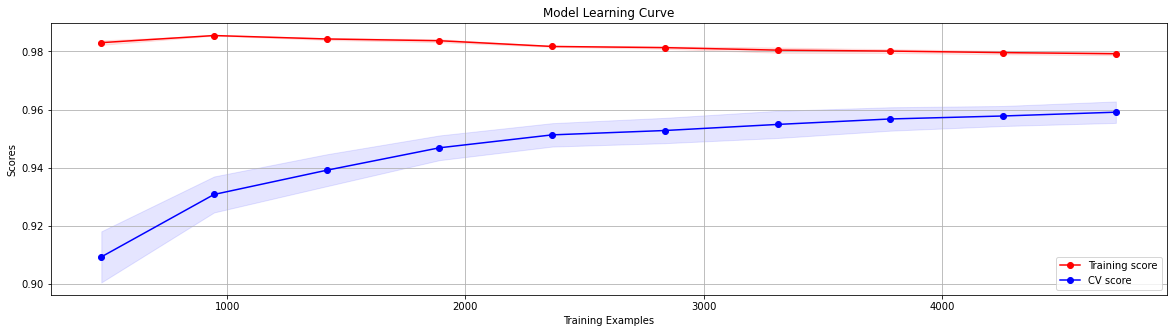

In [176]:
plotlearningcurve(final_model, X_train, y_train);

- Test adjusted R2 > Validation adjusted R2 is a sign of overfitting ie. high variance. 
- We observe that the R² curve is still moving upwards and the gap between the two curves is decreasing. 
- This means that increasing the number of training instances will likely improve the model accuracy as the validation curve converges toward the training curve.


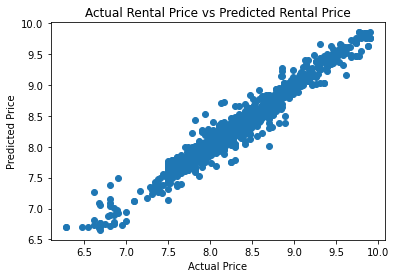

In [179]:
# Visualising actual prices vs predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Rental Price vs Predicted Rental Price")
plt.show()

The prediction shown above looks promising as there is a strong correlation between the model's prediction and its actual results.

In [241]:
import math

#find out that outlier value
for true, pred in zip(y_test, y_test_pred):
    print(f"predicted value: ${pred:.2f}")
    print(f"actual value: ${true:.2f}")

predicted value: $8.37
actual value: $8.46
predicted value: $7.90
actual value: $7.78
predicted value: $7.98
actual value: $7.94
predicted value: $9.84
actual value: $9.80
predicted value: $8.56
actual value: $8.61
predicted value: $7.75
actual value: $7.82
predicted value: $8.14
actual value: $8.01
predicted value: $7.89
actual value: $7.88
predicted value: $9.18
actual value: $9.29
predicted value: $8.18
actual value: $8.29
predicted value: $7.26
actual value: $7.38
predicted value: $7.90
actual value: $7.94
predicted value: $8.00
actual value: $8.01
predicted value: $7.96
actual value: $7.99
predicted value: $9.08
actual value: $9.16
predicted value: $7.75
actual value: $7.65
predicted value: $7.95
actual value: $7.94
predicted value: $9.33
actual value: $9.14
predicted value: $7.90
actual value: $7.90
predicted value: $8.92
actual value: $8.82
predicted value: $8.45
actual value: $8.52
predicted value: $7.84
actual value: $7.94
predicted value: $8.21
actual value: $8.29
predicted v

actual value: $9.14
predicted value: $8.19
actual value: $8.12
predicted value: $7.72
actual value: $7.78
predicted value: $8.29
actual value: $8.48
predicted value: $8.12
actual value: $8.01
predicted value: $9.39
actual value: $9.39
predicted value: $7.99
actual value: $7.94
predicted value: $8.91
actual value: $8.82
predicted value: $7.83
actual value: $7.94
predicted value: $7.63
actual value: $7.63
predicted value: $9.10
actual value: $9.18
predicted value: $8.86
actual value: $8.82
predicted value: $8.80
actual value: $8.82
predicted value: $9.43
actual value: $9.38
predicted value: $9.61
actual value: $9.64
predicted value: $8.39
actual value: $8.82
predicted value: $8.19
actual value: $8.12
predicted value: $8.22
actual value: $8.41
predicted value: $8.79
actual value: $8.94
predicted value: $8.99
actual value: $9.06
predicted value: $8.42
actual value: $8.38
predicted value: $8.49
actual value: $8.48
predicted value: $7.94
actual value: $7.86
predicted value: $9.06
actual valu

In [237]:
df_test.loc[df_test['rental_per_month_log'] <= 6.3] 

,beds,size_sqft,age,dist_to_mall_km,dist_to_cbd_km,nearest_psch_dist,rental_per_month_log
5948,1,86,6,1.02,5.83,0.35,6.282267
5949,1,100,6,1.02,5.83,0.35,6.282267


In [3]:
# Getting the rental price from the log rental price of the outlier listing
np.exp(6.282267)

535.0001354106537


<img src="outlier_listing.jpg" width="300" height="400" />

- This listing turns out to be for a shared student hostel located in Queenstown (District 3).
- Misrepresented as a 1 bedroom rental but it should be a shared room with 4 beds. 
- As a result, a size of 100 sqft and a relatively low monthly rental price of \\$535 had caused our model to overestimate its rental price at $820, or approximately 53% more. 

## <b>Conclusion
With our best performing model, LightGBM, we conclude that with the high adjusted R² score of 0.9581 and low RMSE of 0.1218, the selected features were indeed able to explain the variance of our model. 
The top 6 features selected by the LightGBM model are:
1. Size (Most important)
2. Number of bedrooms
3. Distance to CBD
4. Age
5. Distance to Primary School
6. Distance to Shopping Mall
